In [1]:
# Predictive Analytics in Healthcare

In [2]:
'''
In this exercise I am going to import a dataset in which there are different variable to describe readmitted. I will use the data to explain the readmission rate
of the patient following the following steps:
    1- Import the dataset
    2- Treat missing values of the dataset
    3- Transfrom categorical and numerical variables
    4- Analize readmitted depending on age
    5- Study the correlation between variables
    6- Create test and train sets
    7- Perform a logistic regresion model
    8- Provide information about how good is the model
    9- Show the importance of each variable to the model and summarize the most important
'''

'\nIn this exercise I am going to import a dataset in which there are different variable to describe readmitted. I will use the data to explain the readmission rate\nof the patient following the following steps:\n    1- Import the dataset\n    2- Treat missing values of the dataset\n    3- Transfrom categorical and numerical variables\n    4- Analize readmitted depending on age\n    5- Study the correlation between variables\n    6- Create test and train sets\n    7- Perform a logistic regresion model\n    8- Provide information about how good is the model\n    9- Show the importance of each variable to the model and summarize the most important\n'

In [3]:
#import the libraries which will be used
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from sklearn.inspection import permutation_importance
from urllib.request import urlopen
import html5lib
from bs4 import BeautifulSoup

from sklearn.linear_model import LogisticRegression
import plotly.express as px

In [4]:
#dowload the dataset
dir = 'Downloads/diabetic_data.csv/diabetic_data.csv'
diab = pd.read_csv(dir, sep = ',')
pd.options.display.max_columns = None #show all the columns
print(diab.head())#show the dataset first rows

   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital payer_code         medical_specialty  num_lab_procedures  \
0                 1          ?  Pediatrics-Endocrinolo

In [5]:
#change ? for NA
diab=diab.replace("?", np.nan)
diab

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [6]:
diab.isnull().sum() # show the number of NaN of each column

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [7]:
diab.info()#show the structure of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [8]:
# fill Na

for l in diab.select_dtypes('object').columns.values: # find and run the vector of categorical variable names
    moda = diab[l].mode()#create the mode 
    if type(moda) == str:# if the mode only has a value 
        diab[l].fillna(moda, inplace=True) # fill the Na with the mode of the variable
    else:
        diab[l].fillna('unknown', inplace=True) # fill the Na with "unknown"

diab

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),unknown,6,25,1,1,unknown,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,unknown,unknown,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),unknown,1,1,7,3,unknown,unknown,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),unknown,1,1,7,2,unknown,unknown,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),unknown,1,1,7,2,unknown,unknown,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),unknown,1,1,7,1,unknown,unknown,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),unknown,1,3,7,3,MC,unknown,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),unknown,1,4,5,5,MC,unknown,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),unknown,1,1,7,1,MC,unknown,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),unknown,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [9]:
diab.isnull().sum() # show the number of NaN of each column

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [10]:
# convert to categorical features to numerical
for k in diab.select_dtypes('object').columns.values: # find and run the vector of categorical variable names
    label_encoder = LabelEncoder() # create the encoder
     
    diab[k] = label_encoder.fit_transform(diab[k]) # convert the categorical features and add to the dataset

diab

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,2,0,0,9,6,25,1,1,17,37,41,0,1,0,0,0,124,748,789,1,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,0,2
1,149190,55629189,2,0,1,9,1,1,7,3,17,72,59,0,18,0,0,0,143,79,121,9,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,0,1,1
2,64410,86047875,0,0,2,9,1,1,7,2,17,72,11,5,13,2,0,1,454,78,766,6,2,2,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,1,2
3,500364,82442376,2,1,3,9,1,1,7,2,17,72,44,1,16,0,0,0,554,97,248,7,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,0,1,2
4,16680,42519267,2,1,4,9,1,1,7,1,17,72,51,0,8,0,0,0,54,24,86,5,2,2,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,0,1,7,9,1,3,7,3,7,72,51,0,16,0,0,0,102,148,295,9,2,1,2,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1
101762,443847782,74694222,0,0,8,9,1,4,5,5,7,72,33,3,18,0,0,1,381,133,536,9,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,1,1,2
101763,443854148,41088789,2,1,7,9,1,1,7,1,7,72,53,0,9,1,0,0,236,389,159,13,2,2,2,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,2
101764,443857166,31693671,2,0,8,9,2,3,7,10,7,62,45,2,21,0,0,1,693,142,668,9,2,2,1,1,1,1,1,0,2,1,0,2,1,1,1,0,0,0,0,3,1,0,0,0,0,0,1,2


In [11]:
# standarization of the numerical variables using a min max scaler
for k in diab.select_dtypes('int64').columns.values: # find and run the vector of numerical variable names
    scaler = MinMaxScaler() 
    diab[k] = scaler.fit_transform(diab[[k]]) # standarize the numeral features and add to the dataset
    
diab

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0.005105,0.043387,2,0,0,9,0.714286,0.888889,0.000000,0.000000,17,37,0.305344,0.000000,0.0000,0.000000,0.0,0.000000,124,748,789,0.000000,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,0,2
1,0.000308,0.293553,2,0,1,9,0.000000,0.000000,0.250000,0.153846,17,72,0.442748,0.000000,0.2125,0.000000,0.0,0.000000,143,79,121,0.533333,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,0,1,1
2,0.000117,0.454072,0,0,2,9,0.000000,0.000000,0.250000,0.076923,17,72,0.076336,0.833333,0.1500,0.047619,0.0,0.047619,454,78,766,0.333333,2,2,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,1,2
3,0.001099,0.435046,2,1,3,9,0.000000,0.000000,0.250000,0.076923,17,72,0.328244,0.166667,0.1875,0.000000,0.0,0.000000,554,97,248,0.400000,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,0,1,2
4,0.000009,0.224372,2,1,4,9,0.000000,0.000000,0.250000,0.000000,17,72,0.381679,0.000000,0.0875,0.000000,0.0,0.000000,54,24,86,0.266667,2,2,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0.999956,0.528554,0,1,7,9,0.000000,0.074074,0.250000,0.153846,7,72,0.381679,0.000000,0.1875,0.000000,0.0,0.000000,102,148,295,0.533333,2,1,2,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1
101762,0.999956,0.394159,0,0,8,9,0.000000,0.111111,0.166667,0.307692,7,72,0.244275,0.500000,0.2125,0.000000,0.0,0.047619,381,133,536,0.533333,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,1,1,2
101763,0.999971,0.216824,2,1,7,9,0.000000,0.000000,0.250000,0.000000,7,72,0.396947,0.000000,0.1000,0.023810,0.0,0.000000,236,389,159,0.800000,2,2,2,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,2
101764,0.999977,0.167246,2,0,8,9,0.142857,0.074074,0.250000,0.692308,7,62,0.335878,0.333333,0.2500,0.000000,0.0,0.047619,693,142,668,0.533333,2,2,1,1,1,1,1,0,2,1,0,2,1,1,1,0,0,0,0,3,1,0,0,0,0,0,1,2


In [14]:
#now group the dataset by age and readmitted to see the number of patient in each range of age have been readmitted (in how many time) or not
lista = diab.groupby(['age', 'readmitted']).size()
lista

age  readmitted
0    0                 3
     1                26
     2               132
1    0                40
     1               224
     2               427
2    0               236
     1               510
     2               911
3    0               424
     1              1187
     2              2164
4    0              1027
     1              3278
     2              5380
5    0              1668
     1              5917
     2              9671
6    0              2502
     1              7897
     2             12084
7    0              3069
     1              9475
     2             13524
8    0              2078
     1              6223
     2              8896
9    0               310
     1               808
     2              1675
dtype: int64

In [15]:
# i create this function to add the value of the labels in the barplots
def add_value_label(x_list, y_list):
    for i in range(0, len(x_list)):
        plt.text(i, y_list[i], y_list[i])

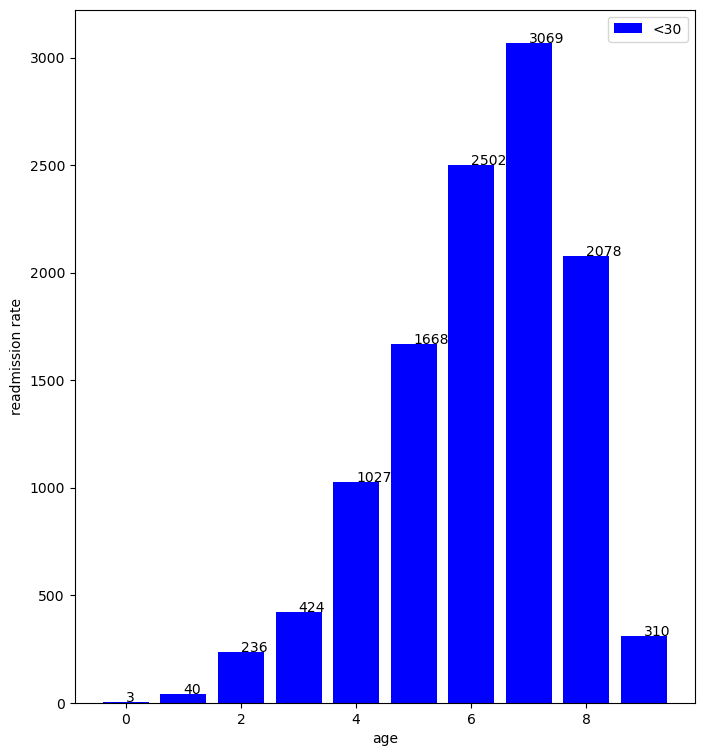

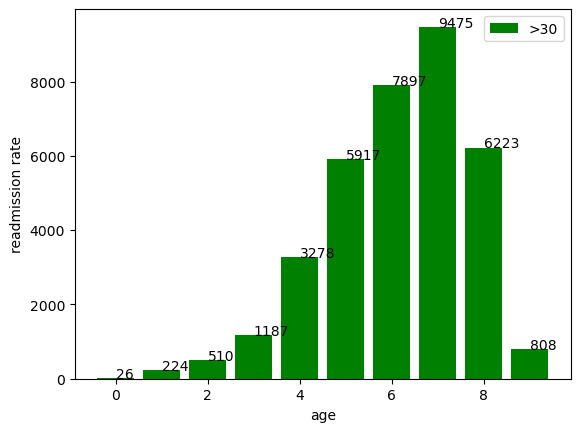

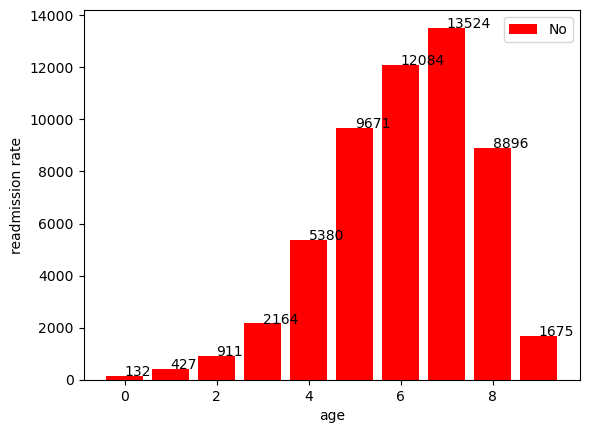

In [16]:
# plot the bar charts. For each class of readmitted i print the bar chart grouped by age
plt.figure(figsize = (8, 9))

conteo1 = diab[diab['readmitted'] == 0].groupby('age').size()# choose the class "0" of readmitted, group it by age and count the number of patient in each categoy
plt.bar(conteo1.index, conteo1, color = 'b', label = '<30') # create the barplot to indicate the number of repetitiones of each class
add_value_label(conteo1.index, conteo1) # add the label values
plt.legend()
plt.xlabel('age')
plt.ylabel('readmission rate')
plt.show()  #plot the bar chart

conteo2 = diab[diab['readmitted'] == 1].groupby('age').size()
plt.bar(conteo2.index, conteo2, label = '>30', color = 'g') 
add_value_label(conteo2.index, conteo2) 
plt.legend()
plt.xlabel('age')
plt.ylabel('readmission rate')
plt.show()  

conteo3 = diab[diab['readmitted'] == 2].groupby('age').size()
plt.bar(conteo3.index, conteo3, label = 'No', color = 'r') 
add_value_label(conteo3.index, conteo3) 
plt.legend()
plt.xlabel('age')
plt.ylabel('readmission rate')
plt.show()  

In [17]:
# there are many variables so i will split these in five groups creating a list which contain them
sep = []
for k in range(0,5):
    sep.append(diab.columns.values[(0+k*10):(10+k*10)])

sep

[array(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
        'admission_type_id', 'discharge_disposition_id',
        'admission_source_id', 'time_in_hospital'], dtype=object),
 array(['payer_code', 'medical_specialty', 'num_lab_procedures',
        'num_procedures', 'num_medications', 'number_outpatient',
        'number_emergency', 'number_inpatient', 'diag_1', 'diag_2'],
       dtype=object),
 array(['diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
        'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
        'glimepiride', 'acetohexamide'], dtype=object),
 array(['glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
        'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
        'tolazamide', 'examide'], dtype=object),
 array(['citoglipton', 'insulin', 'glyburide-metformin',
        'glipizide-metformin', 'glimepiride-pioglitazone',
        'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
        'diabetesMed'

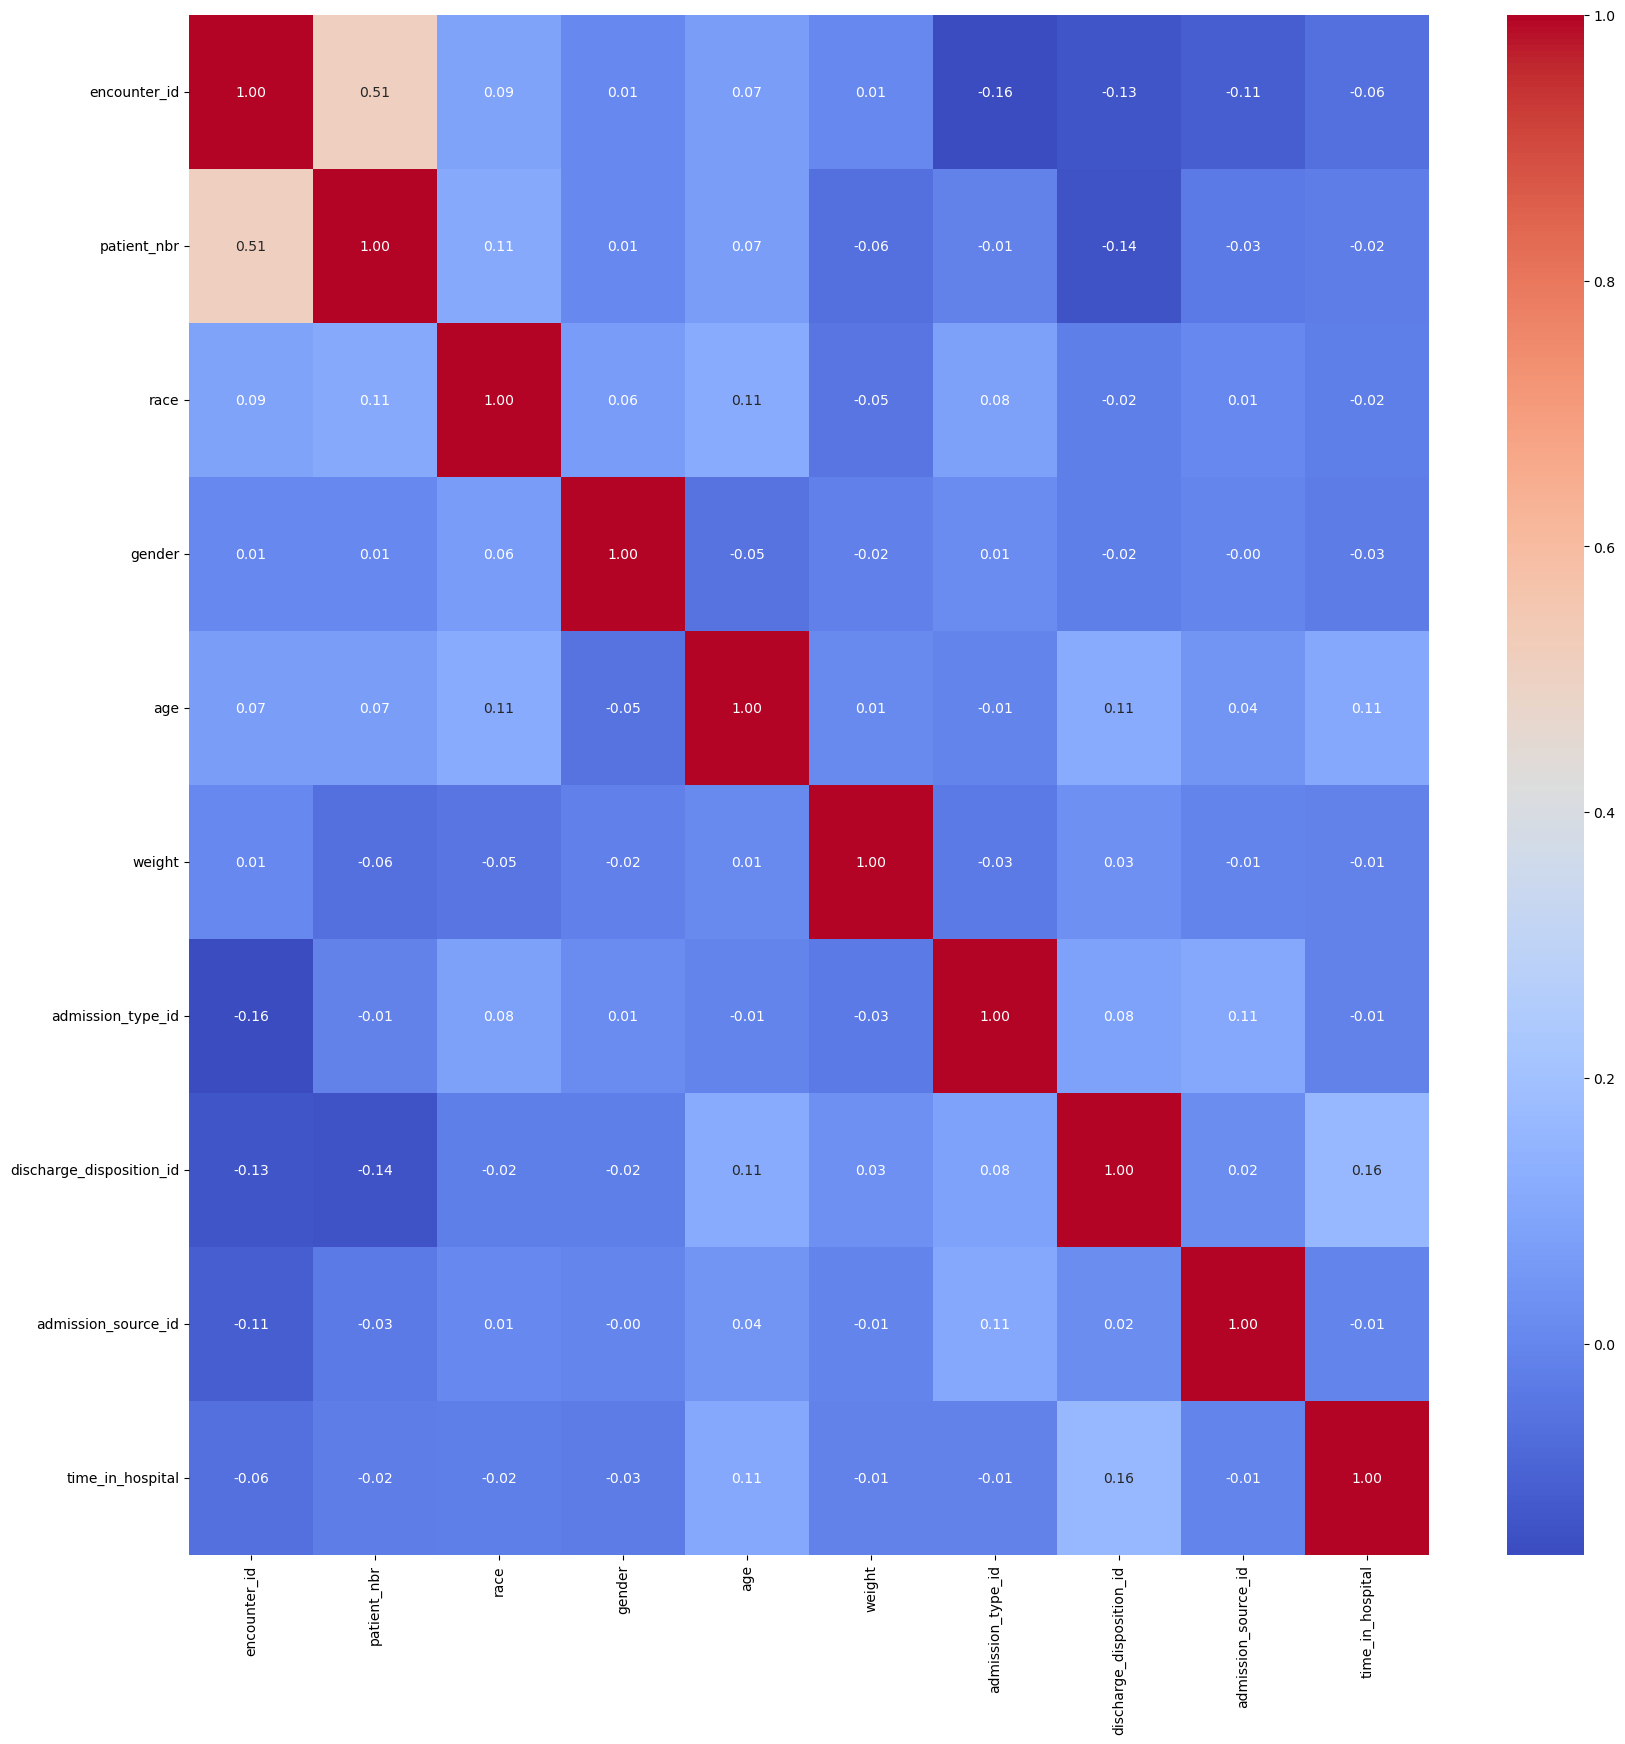

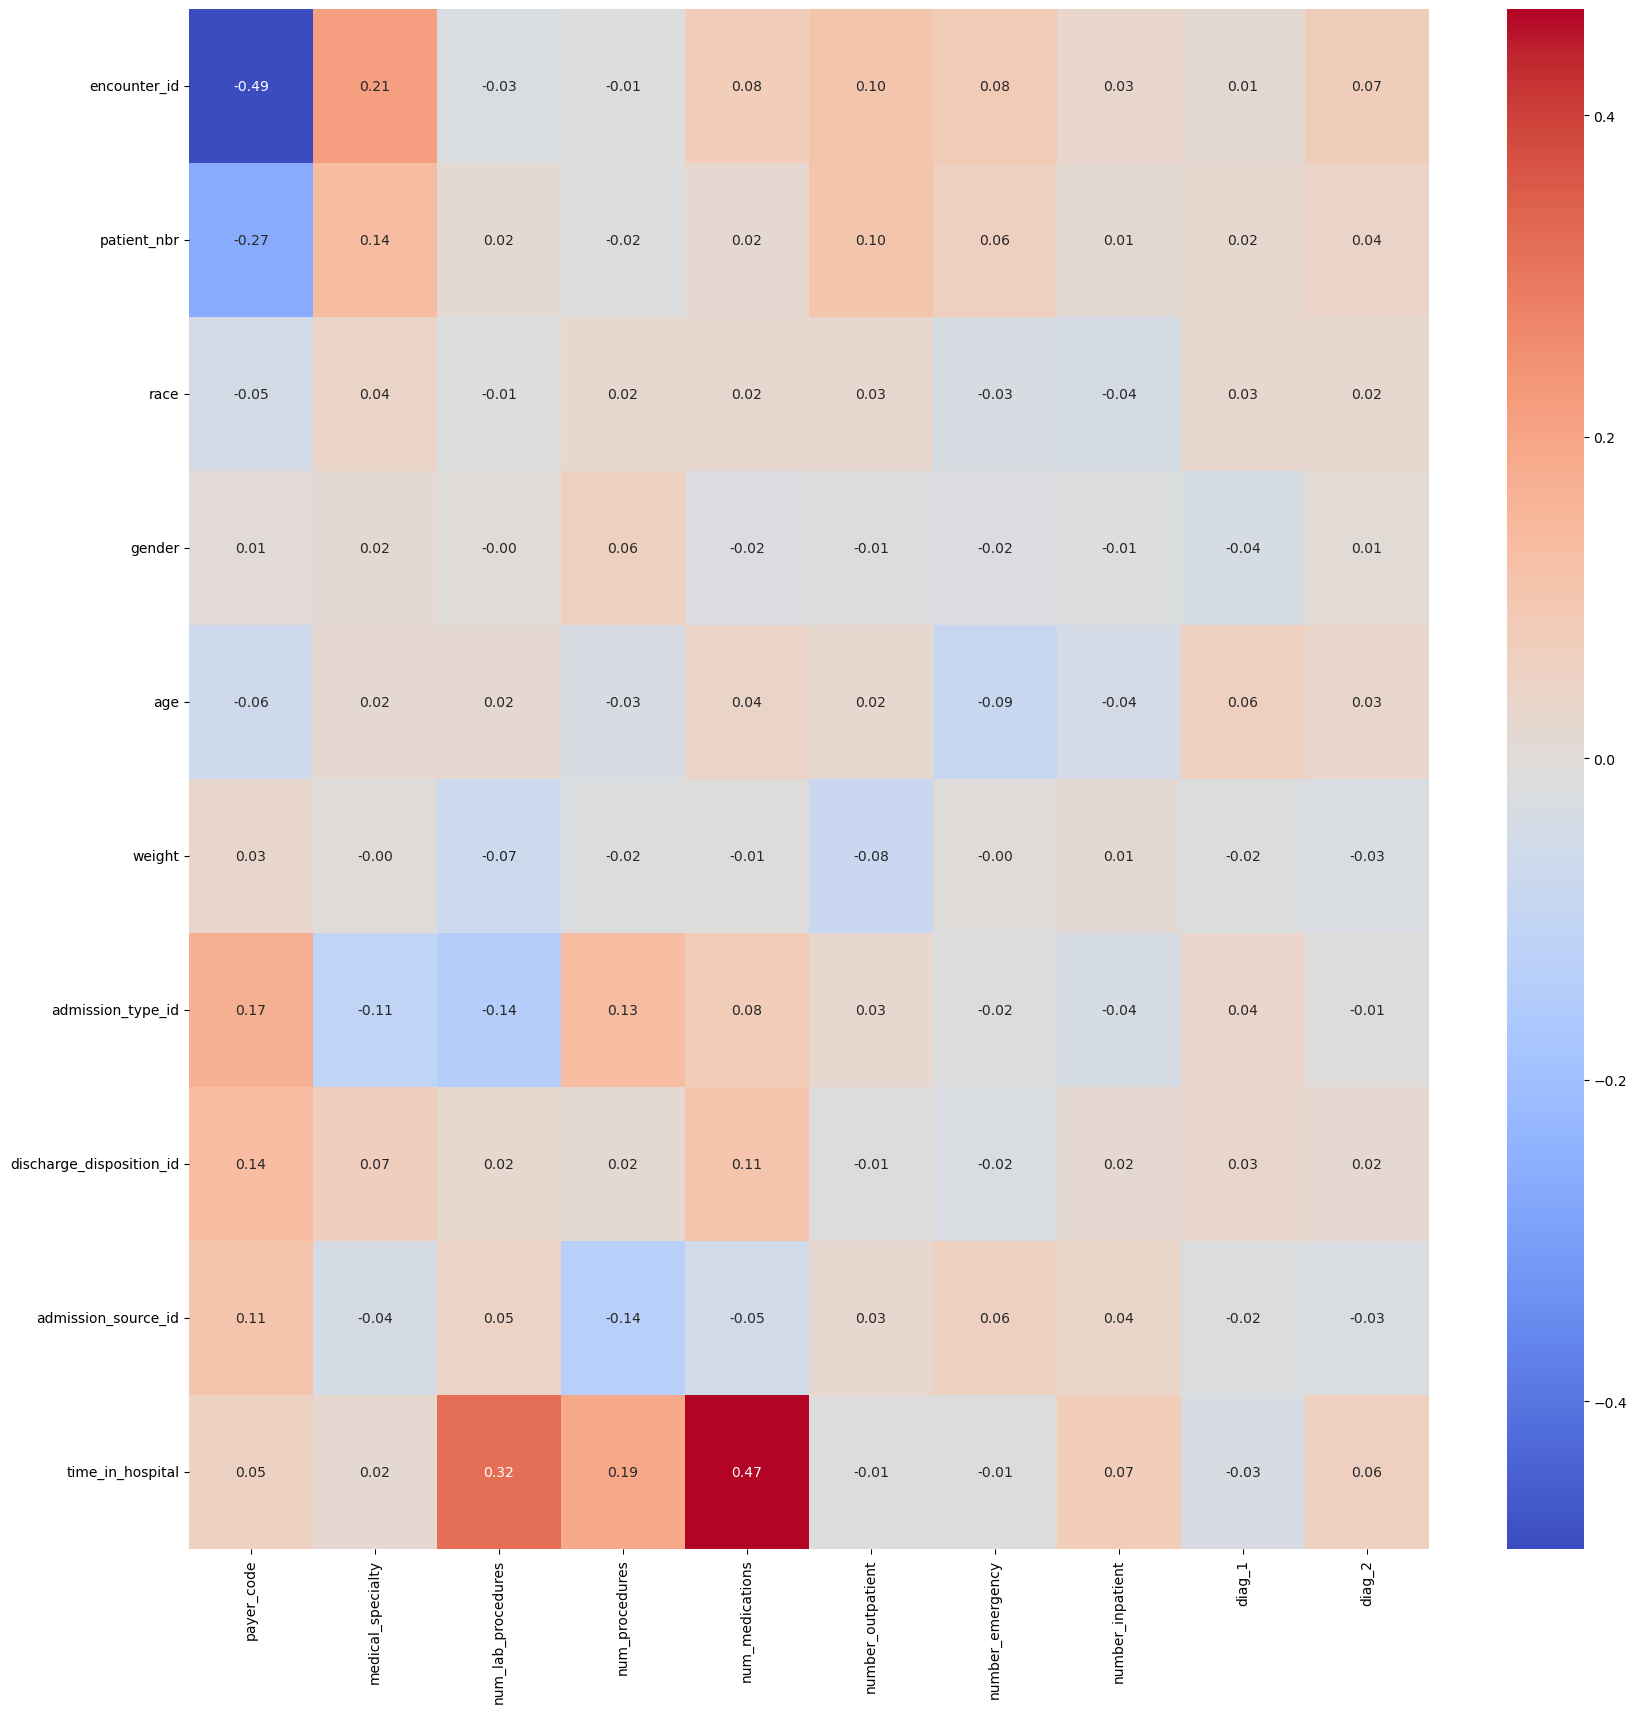

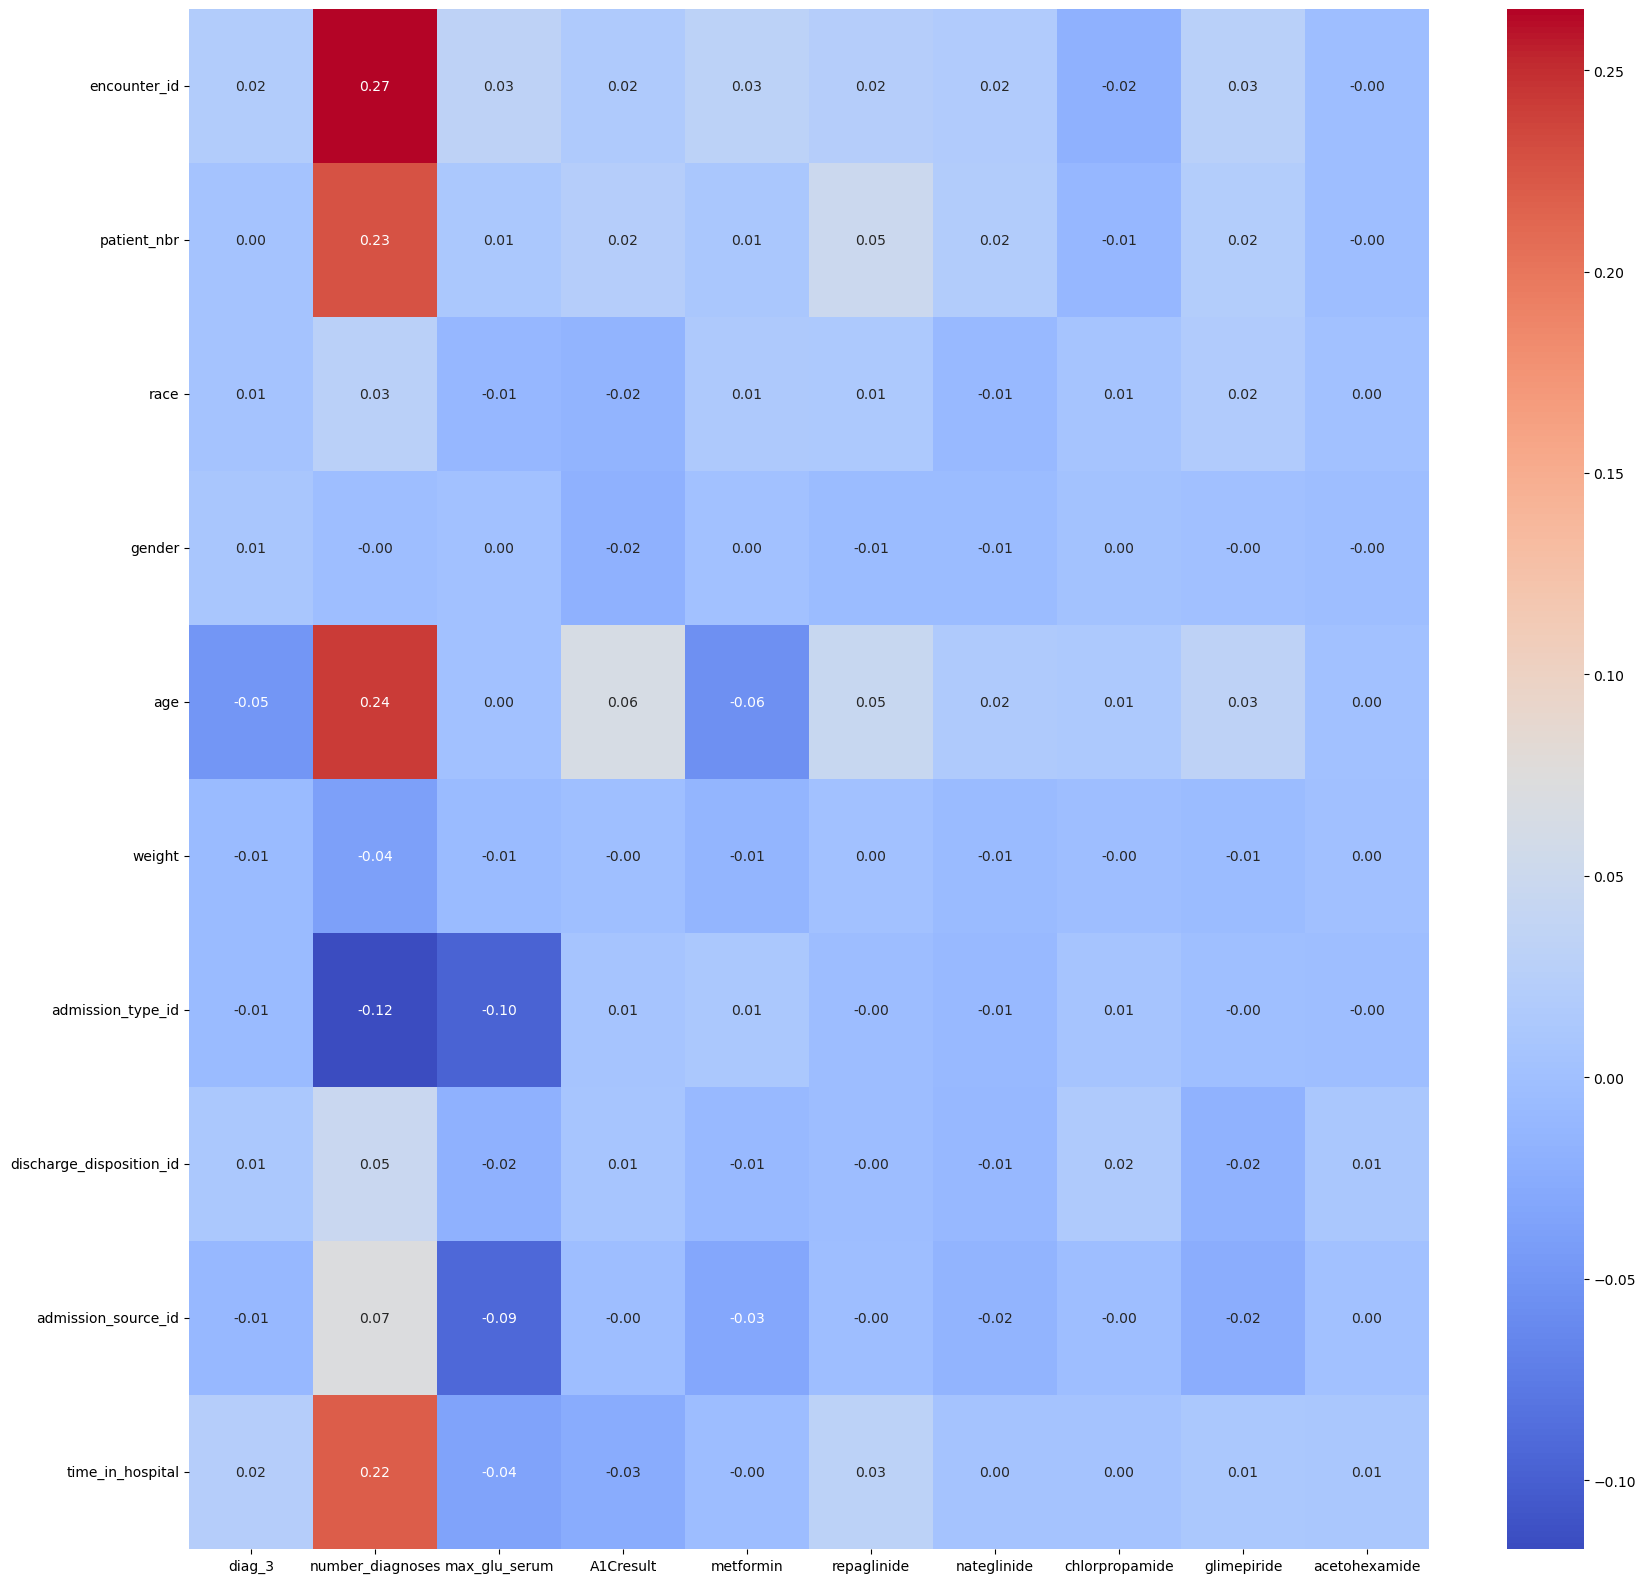

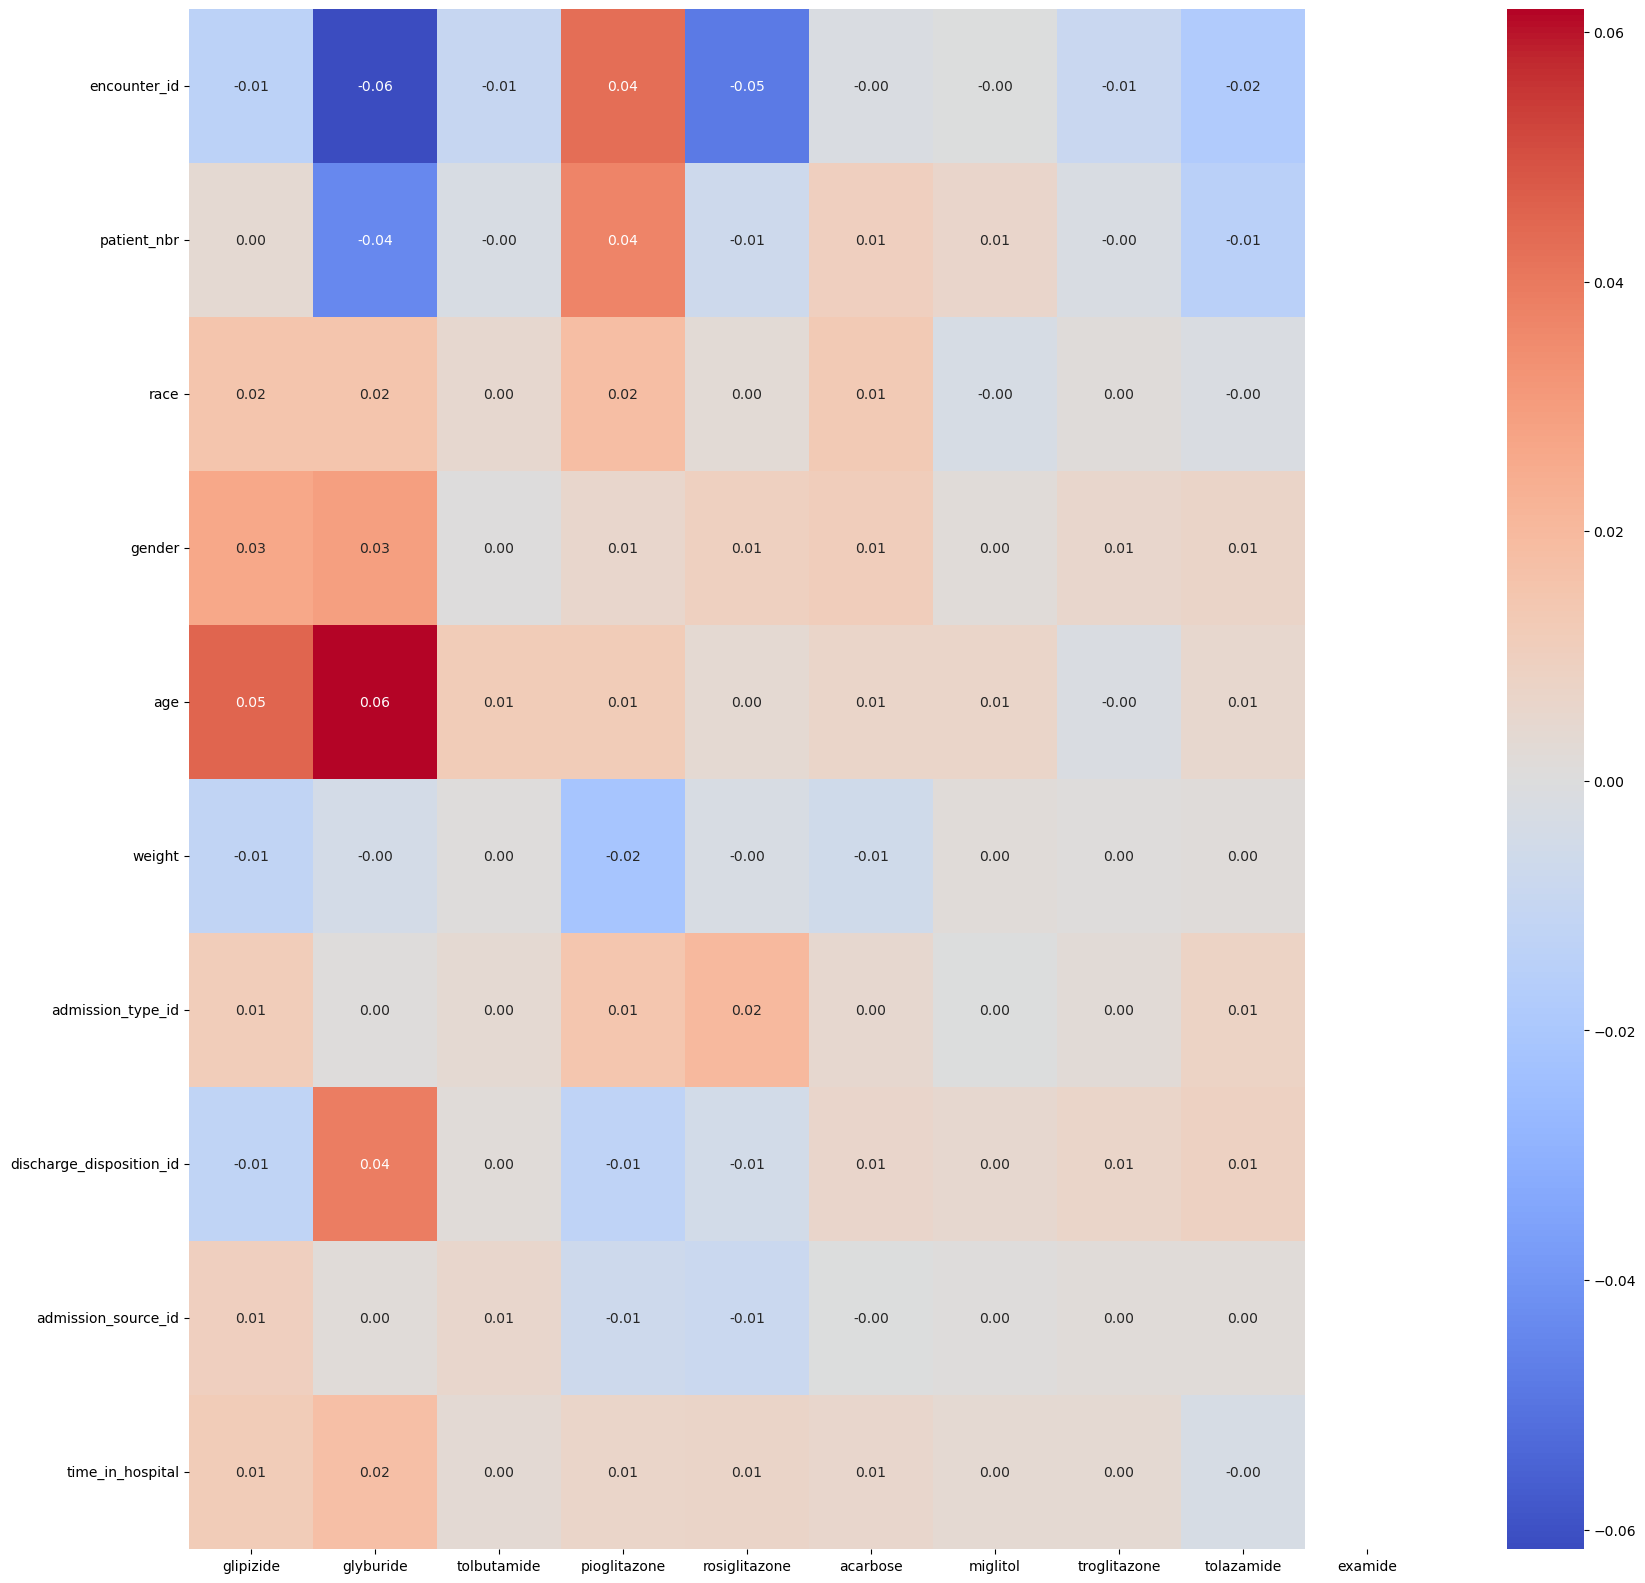

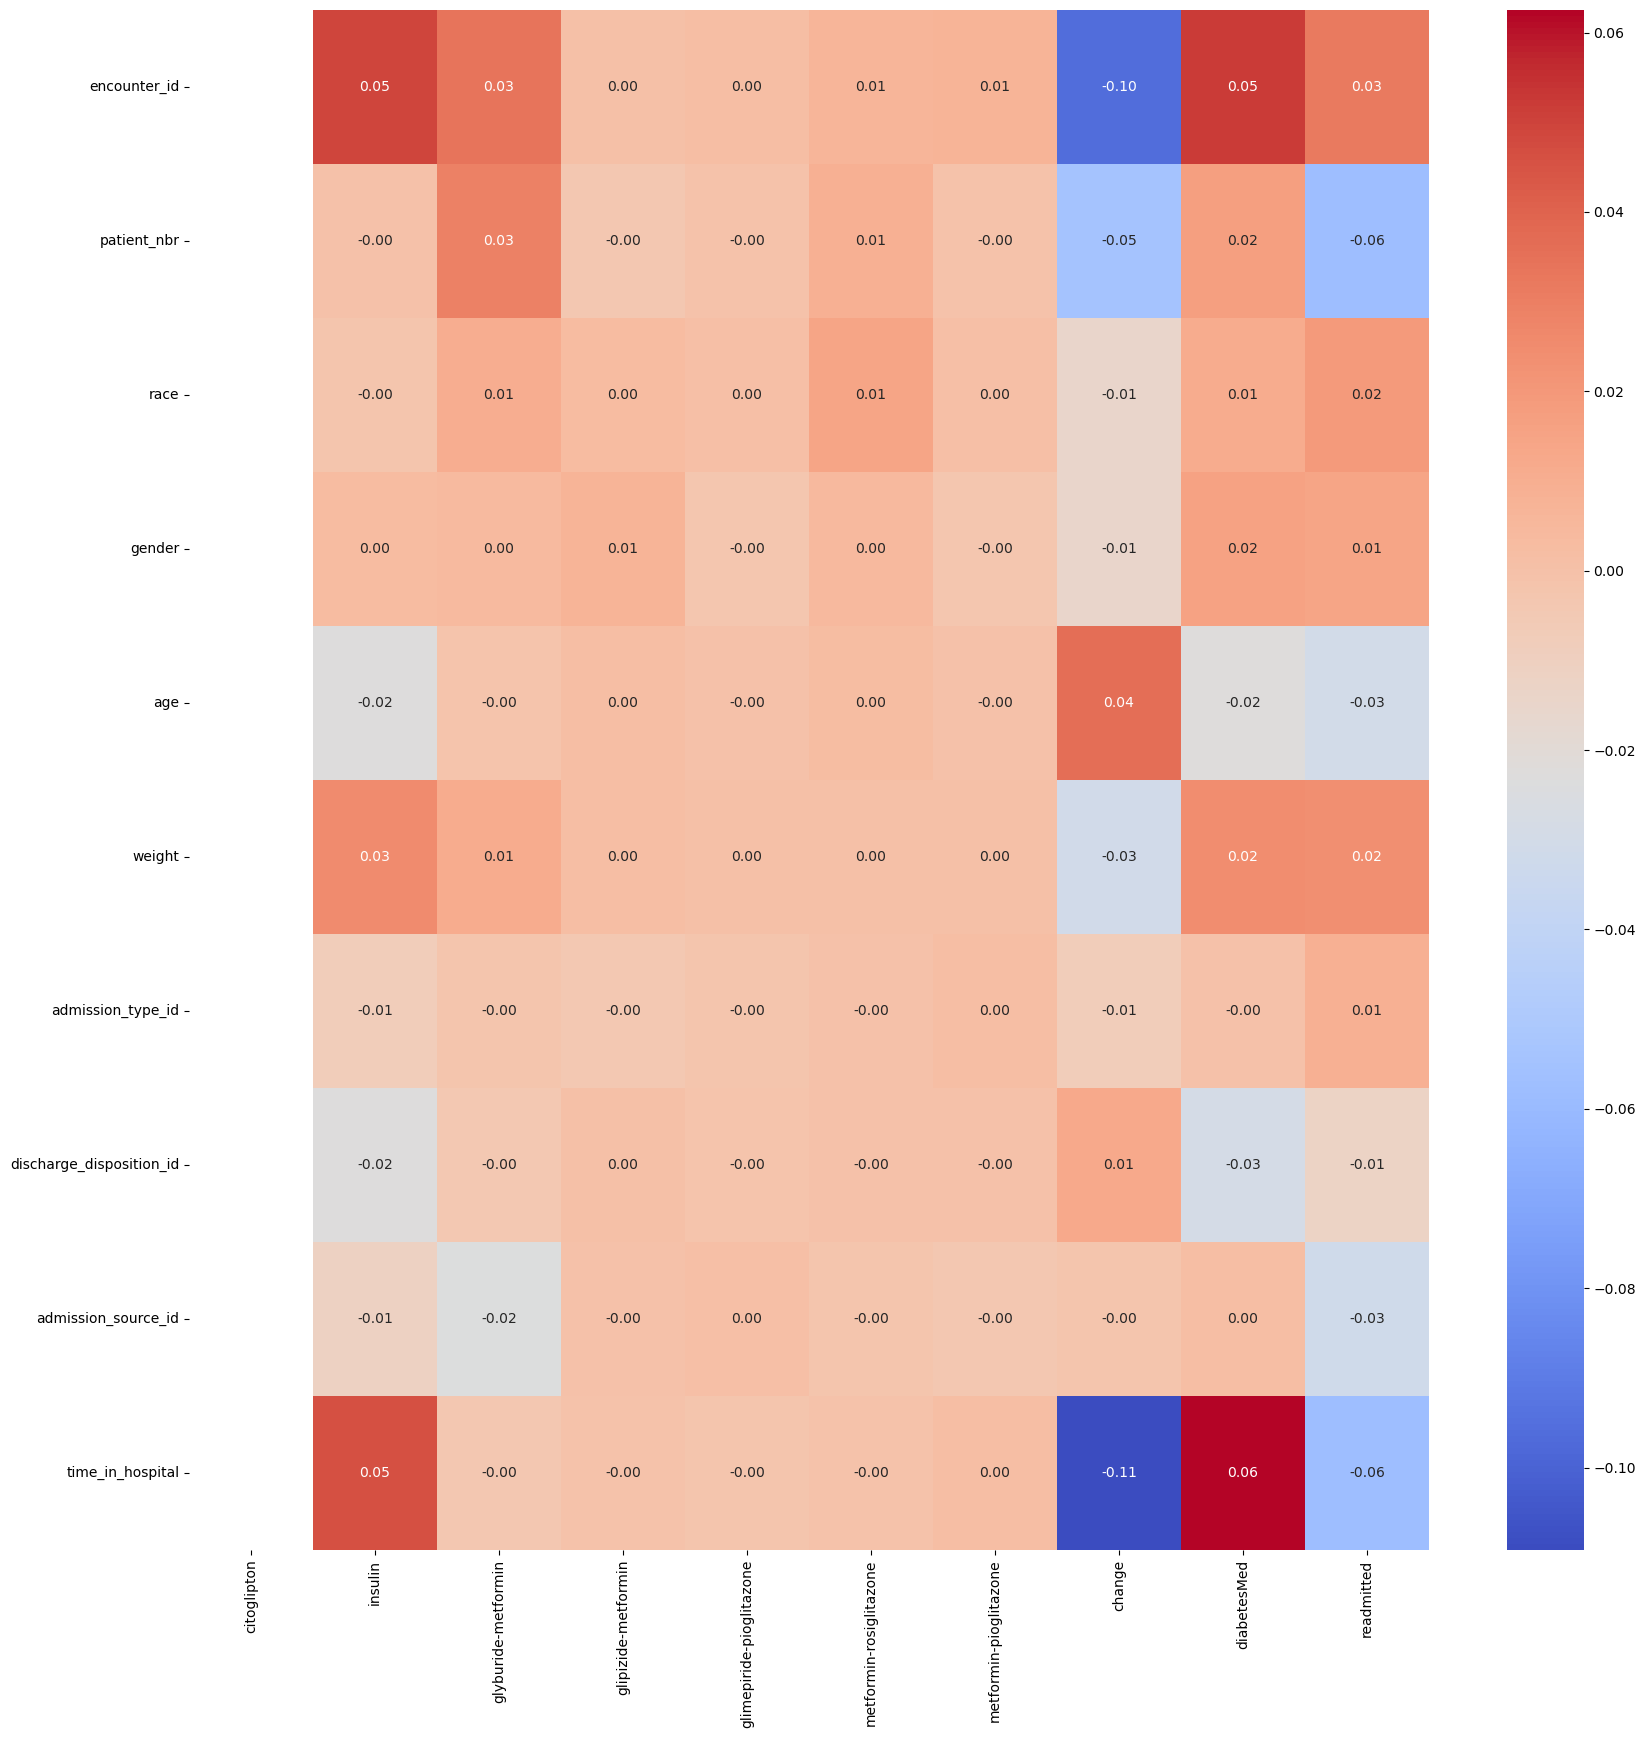

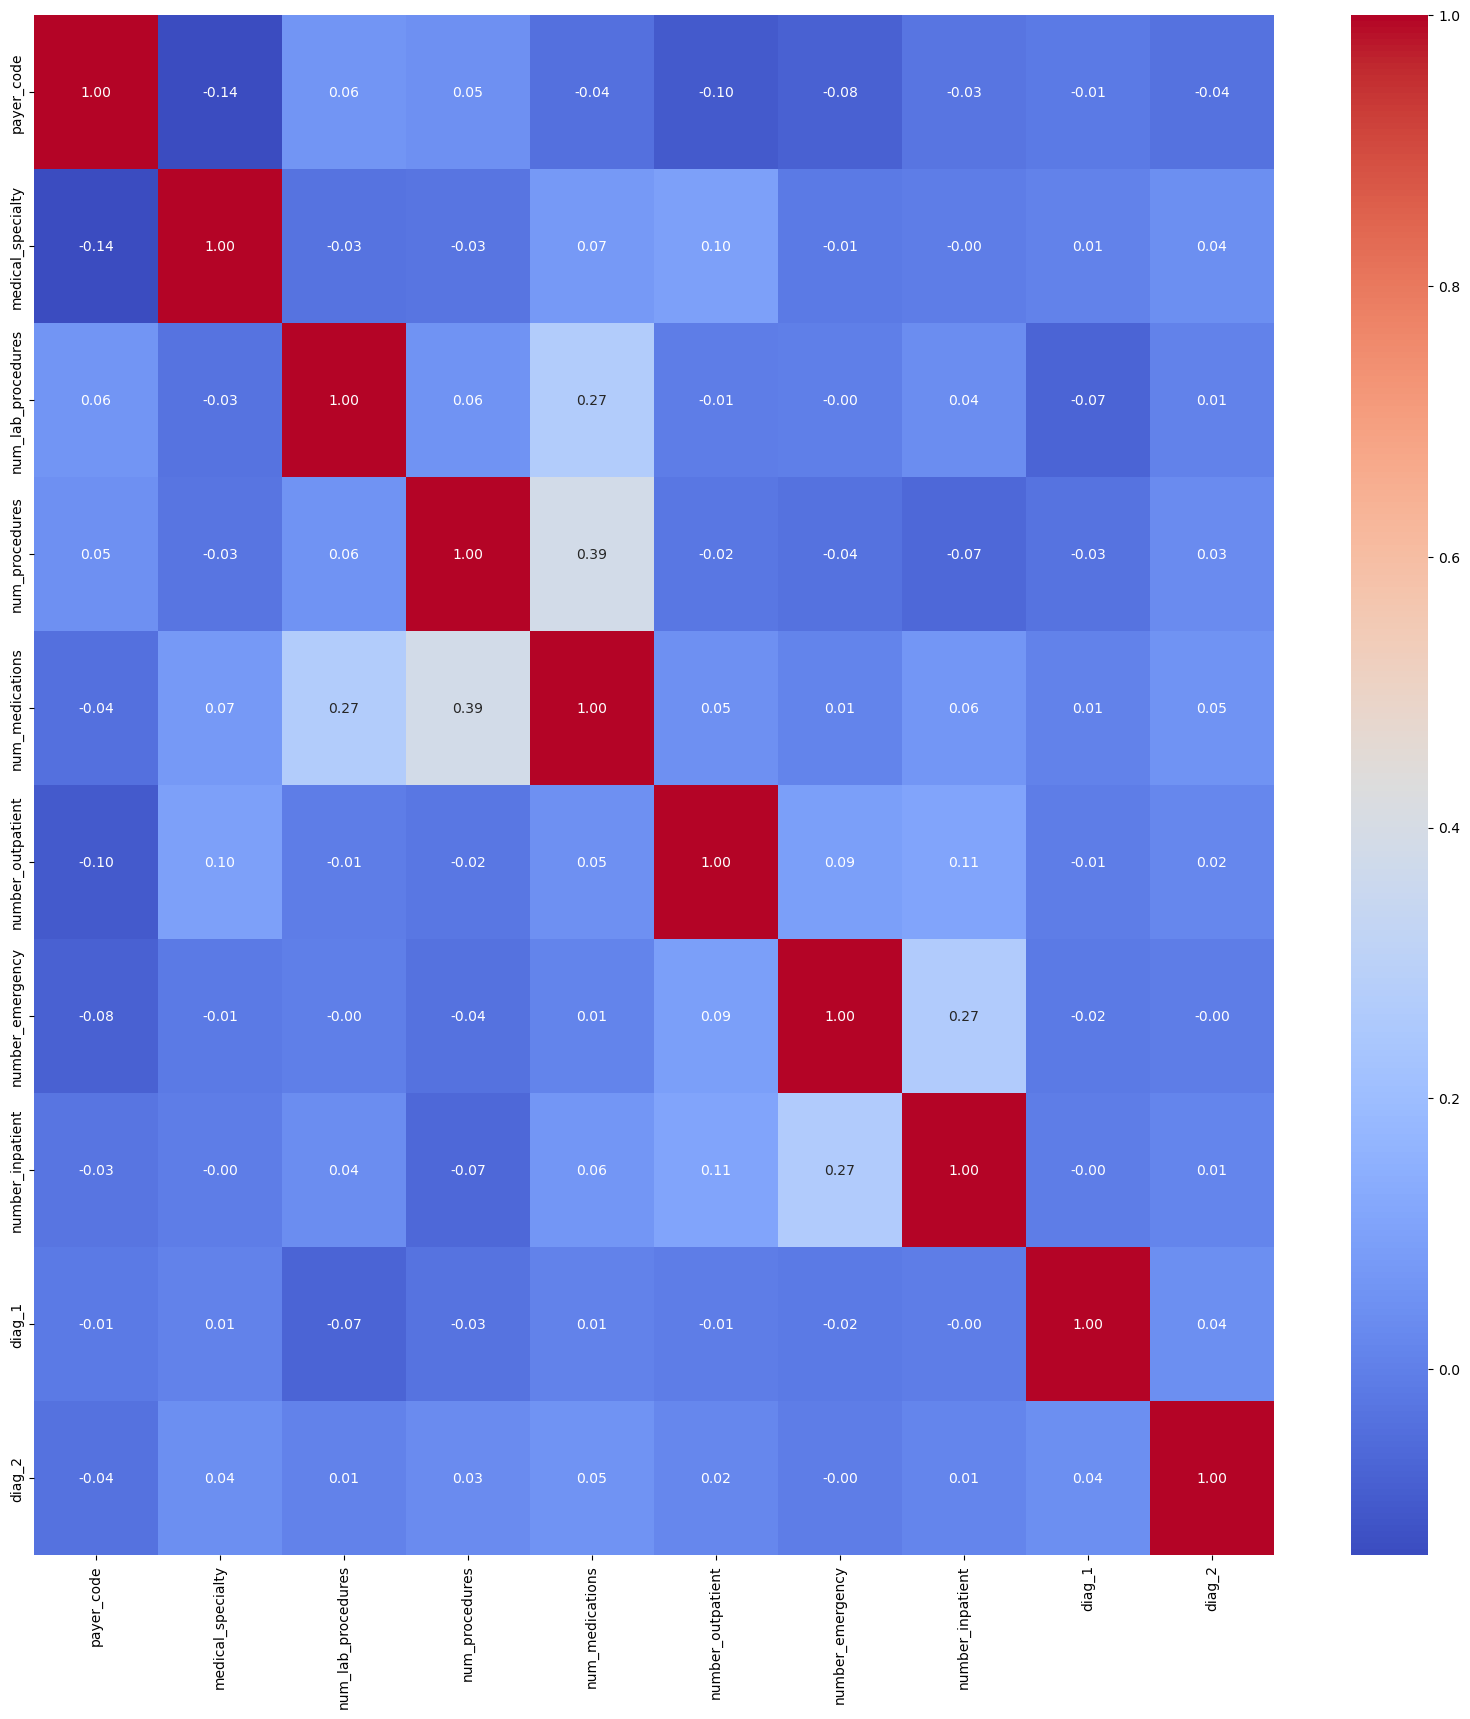

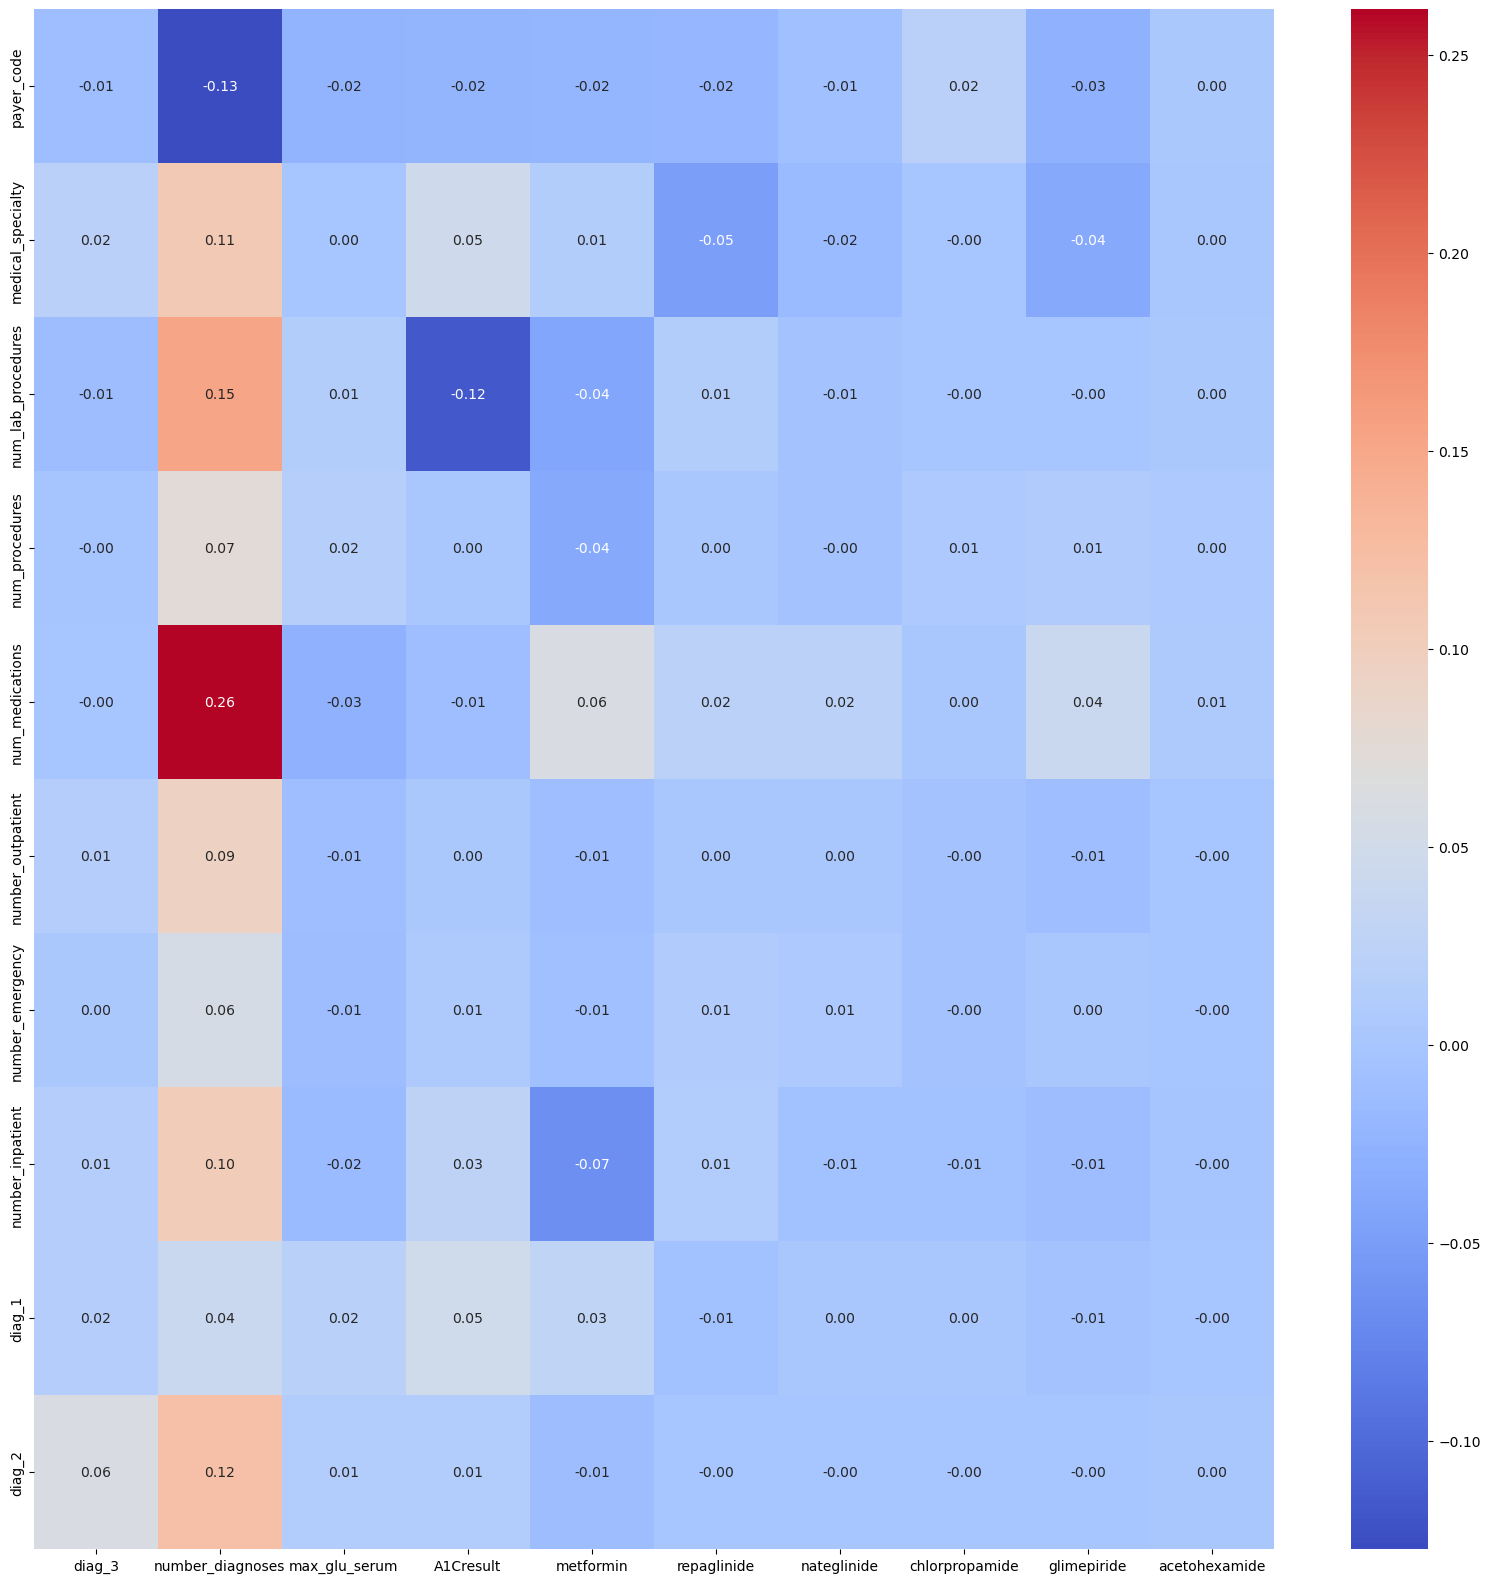

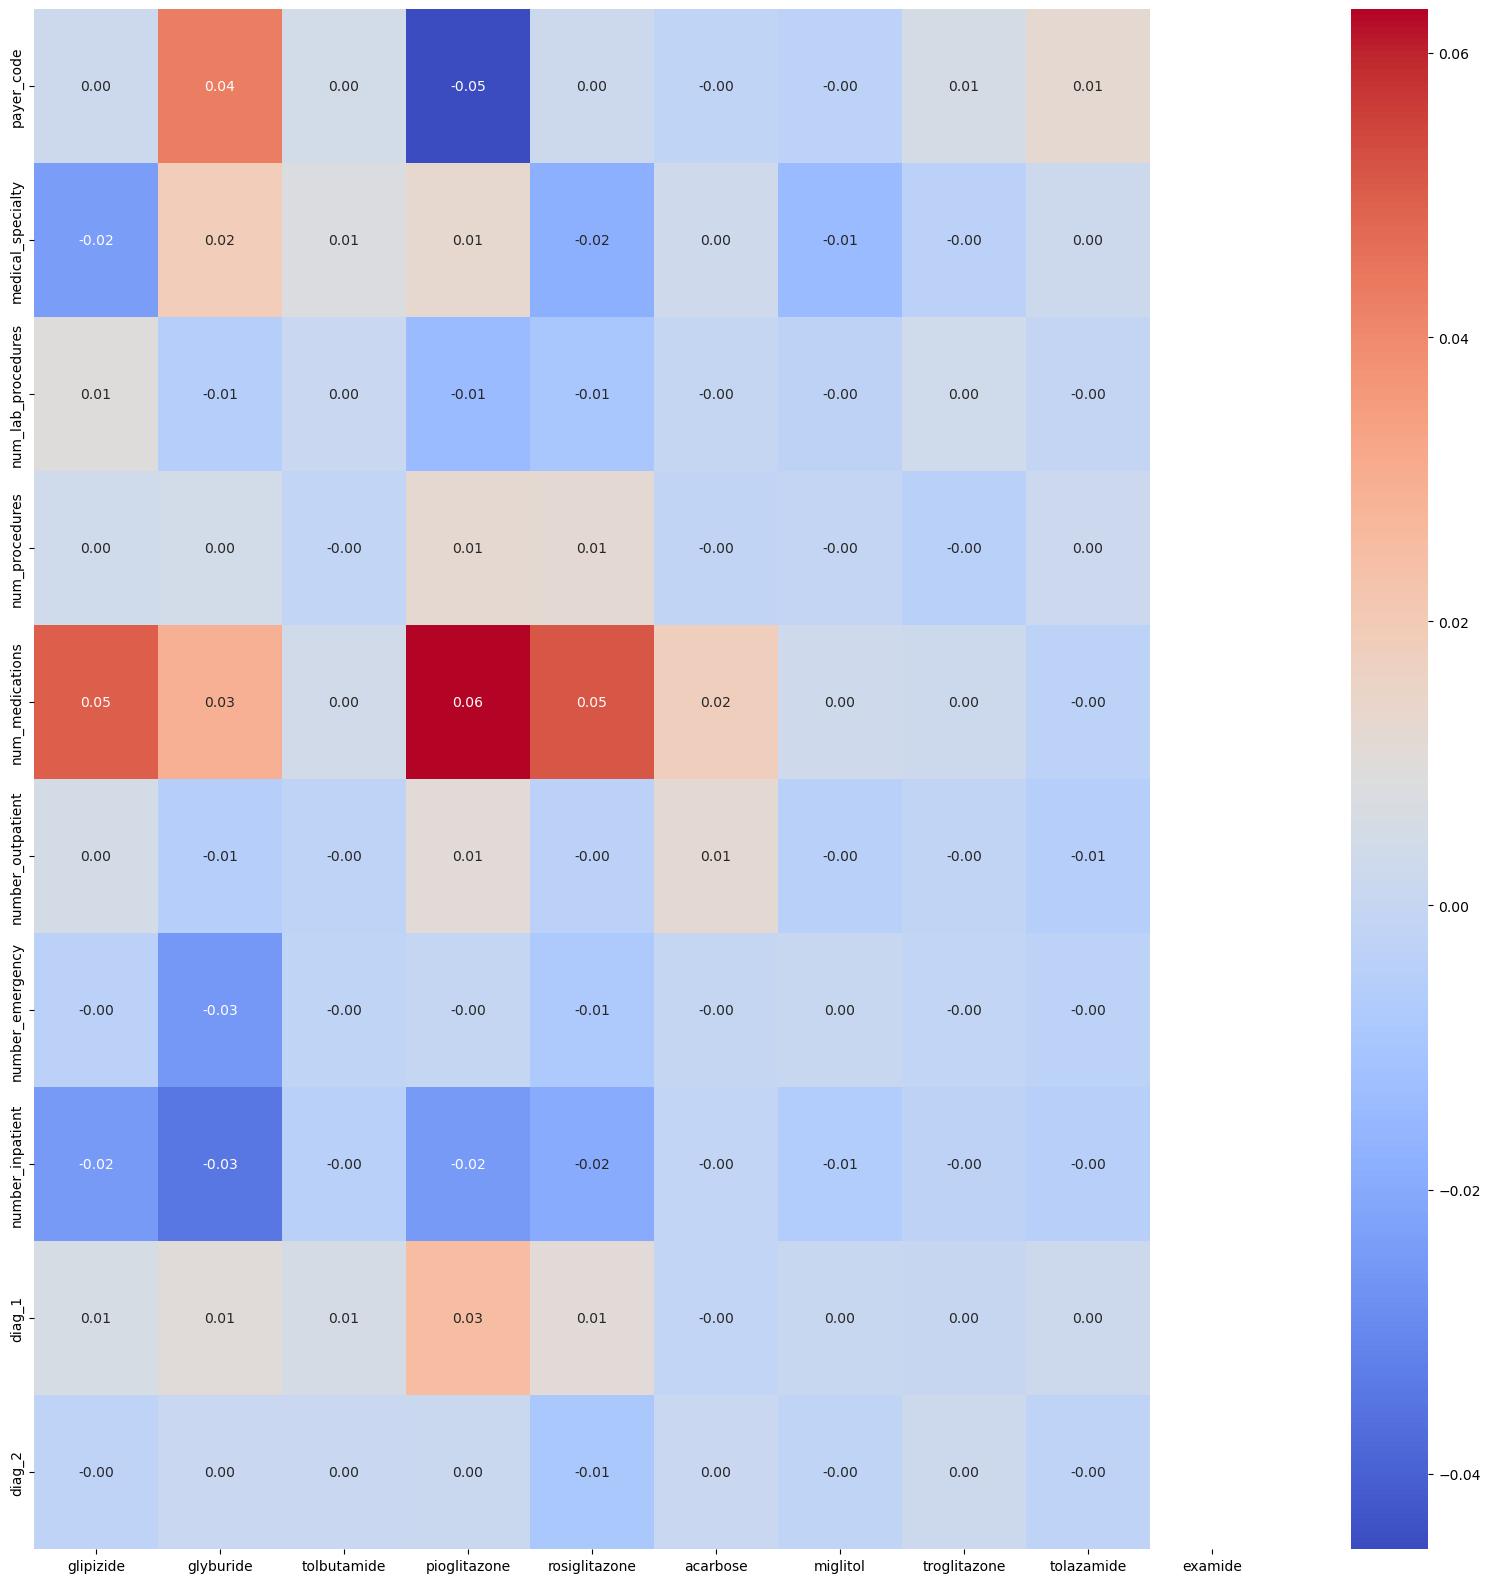

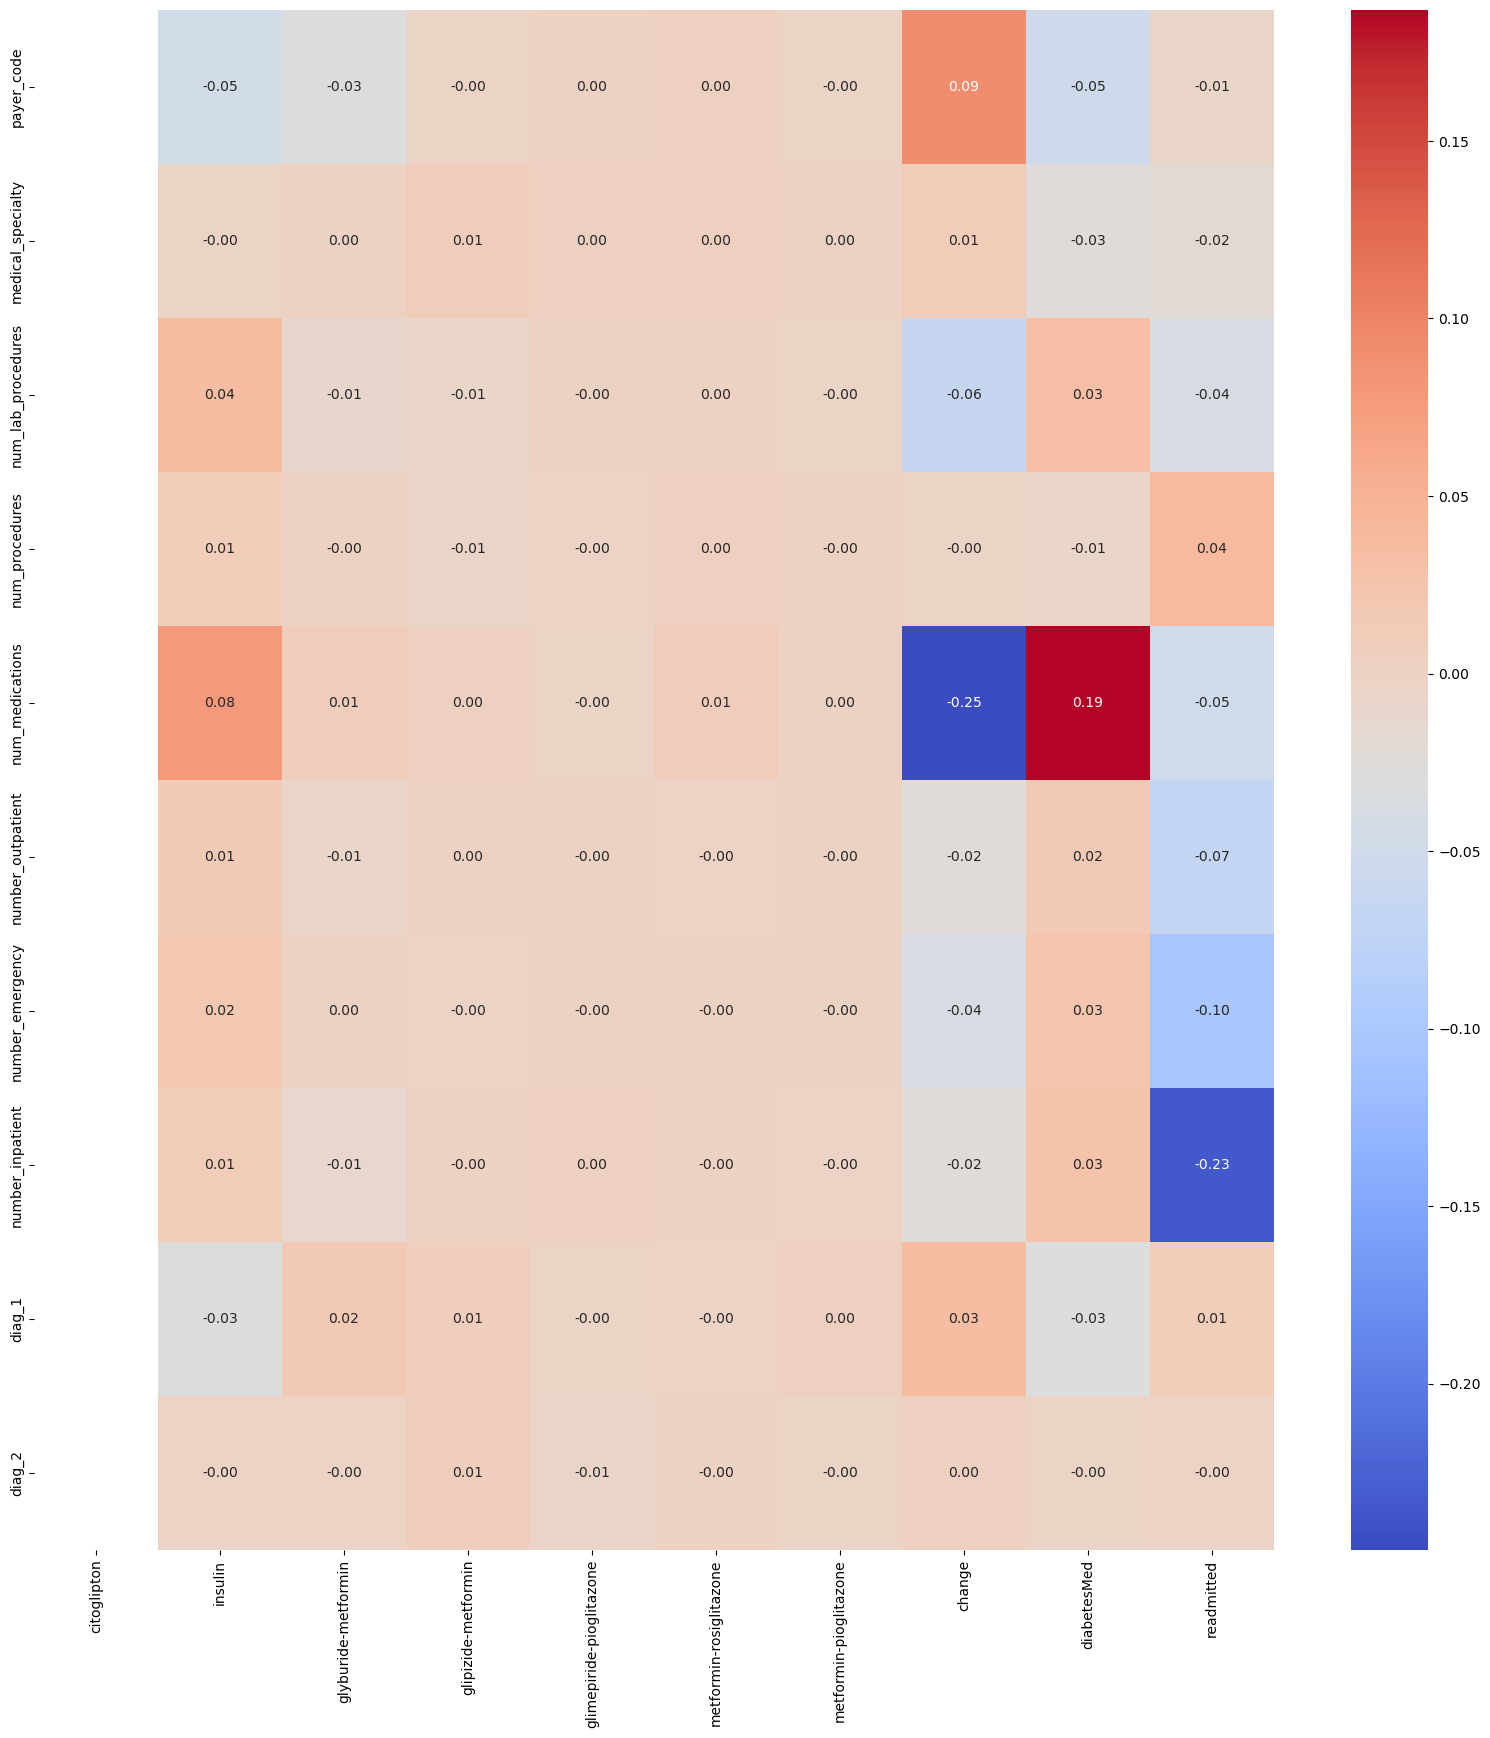

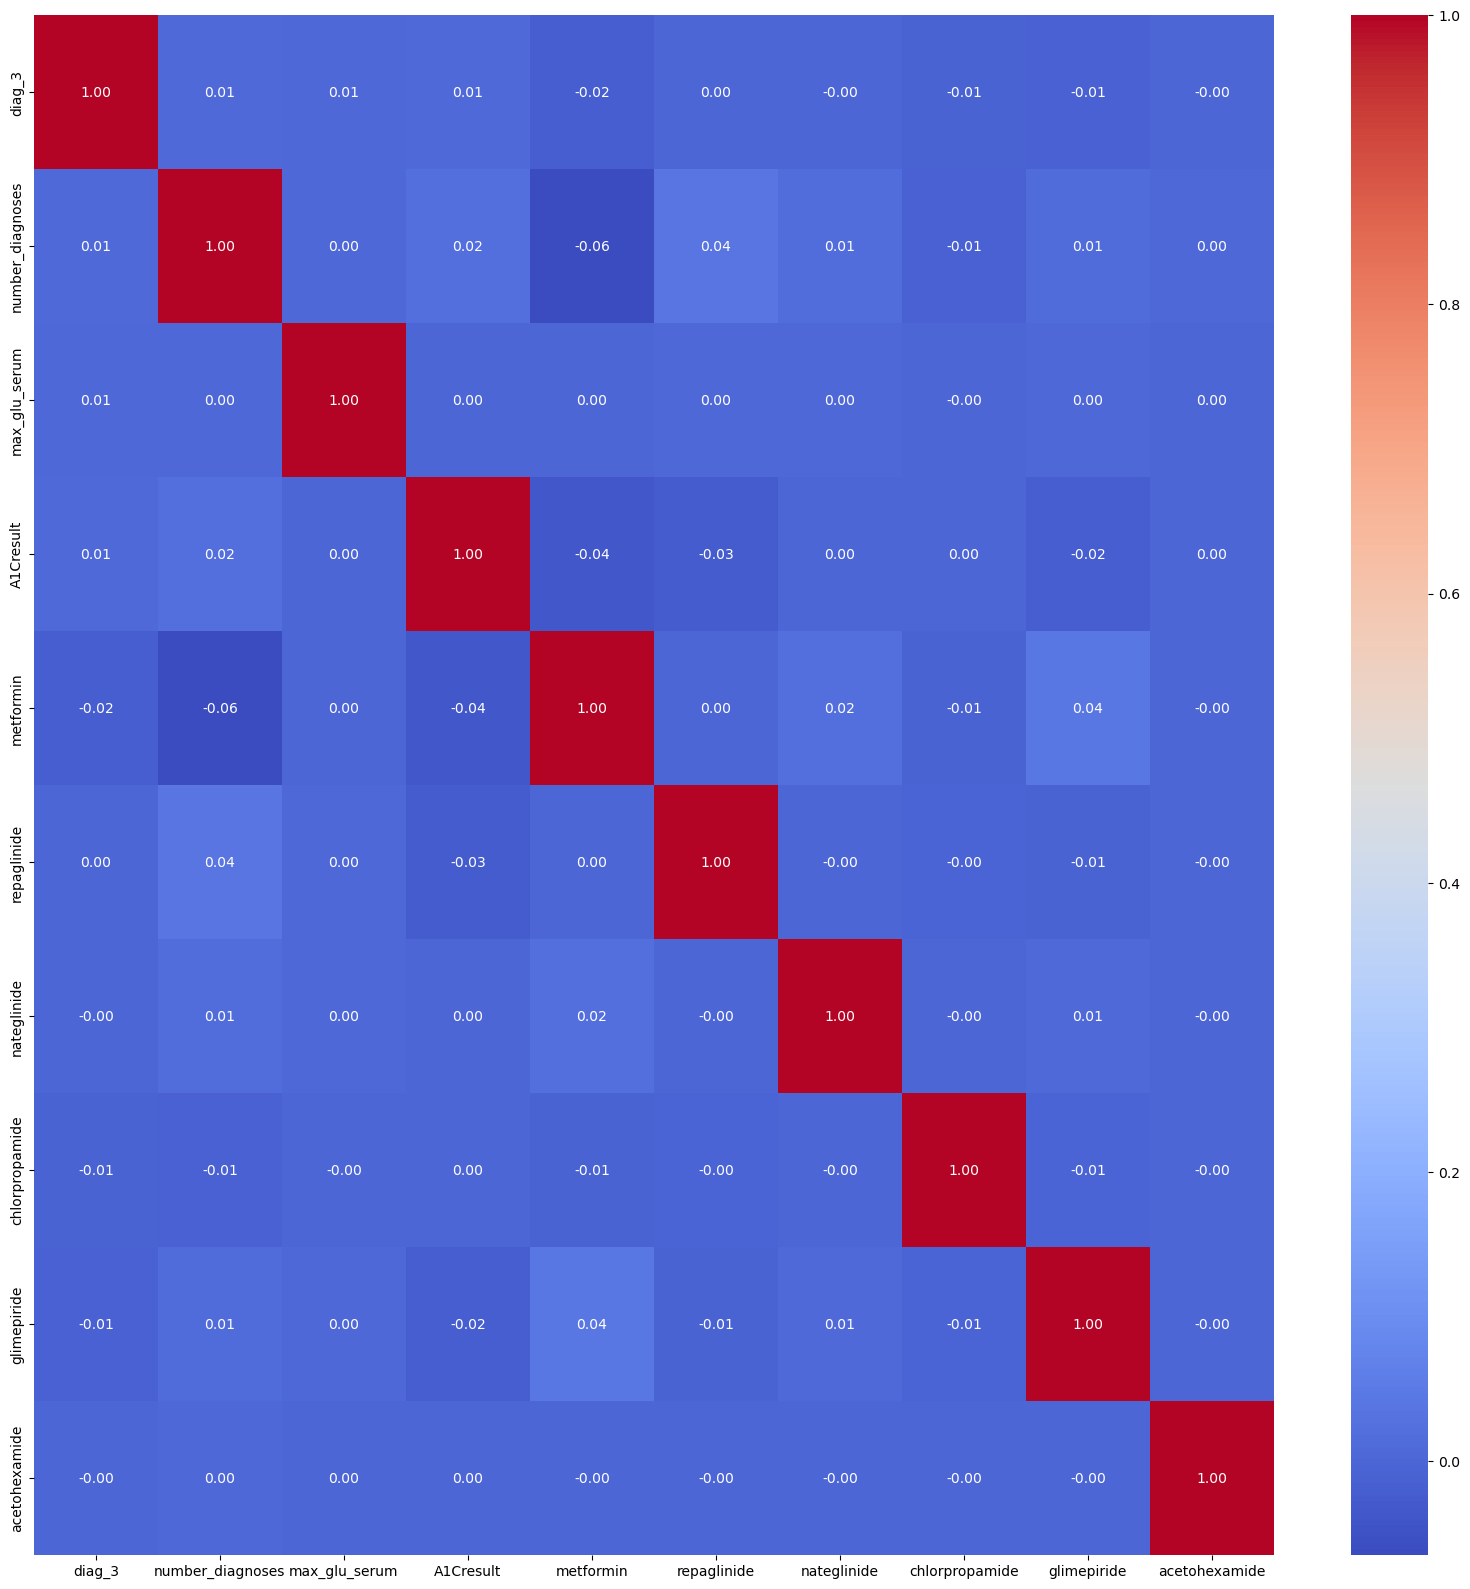

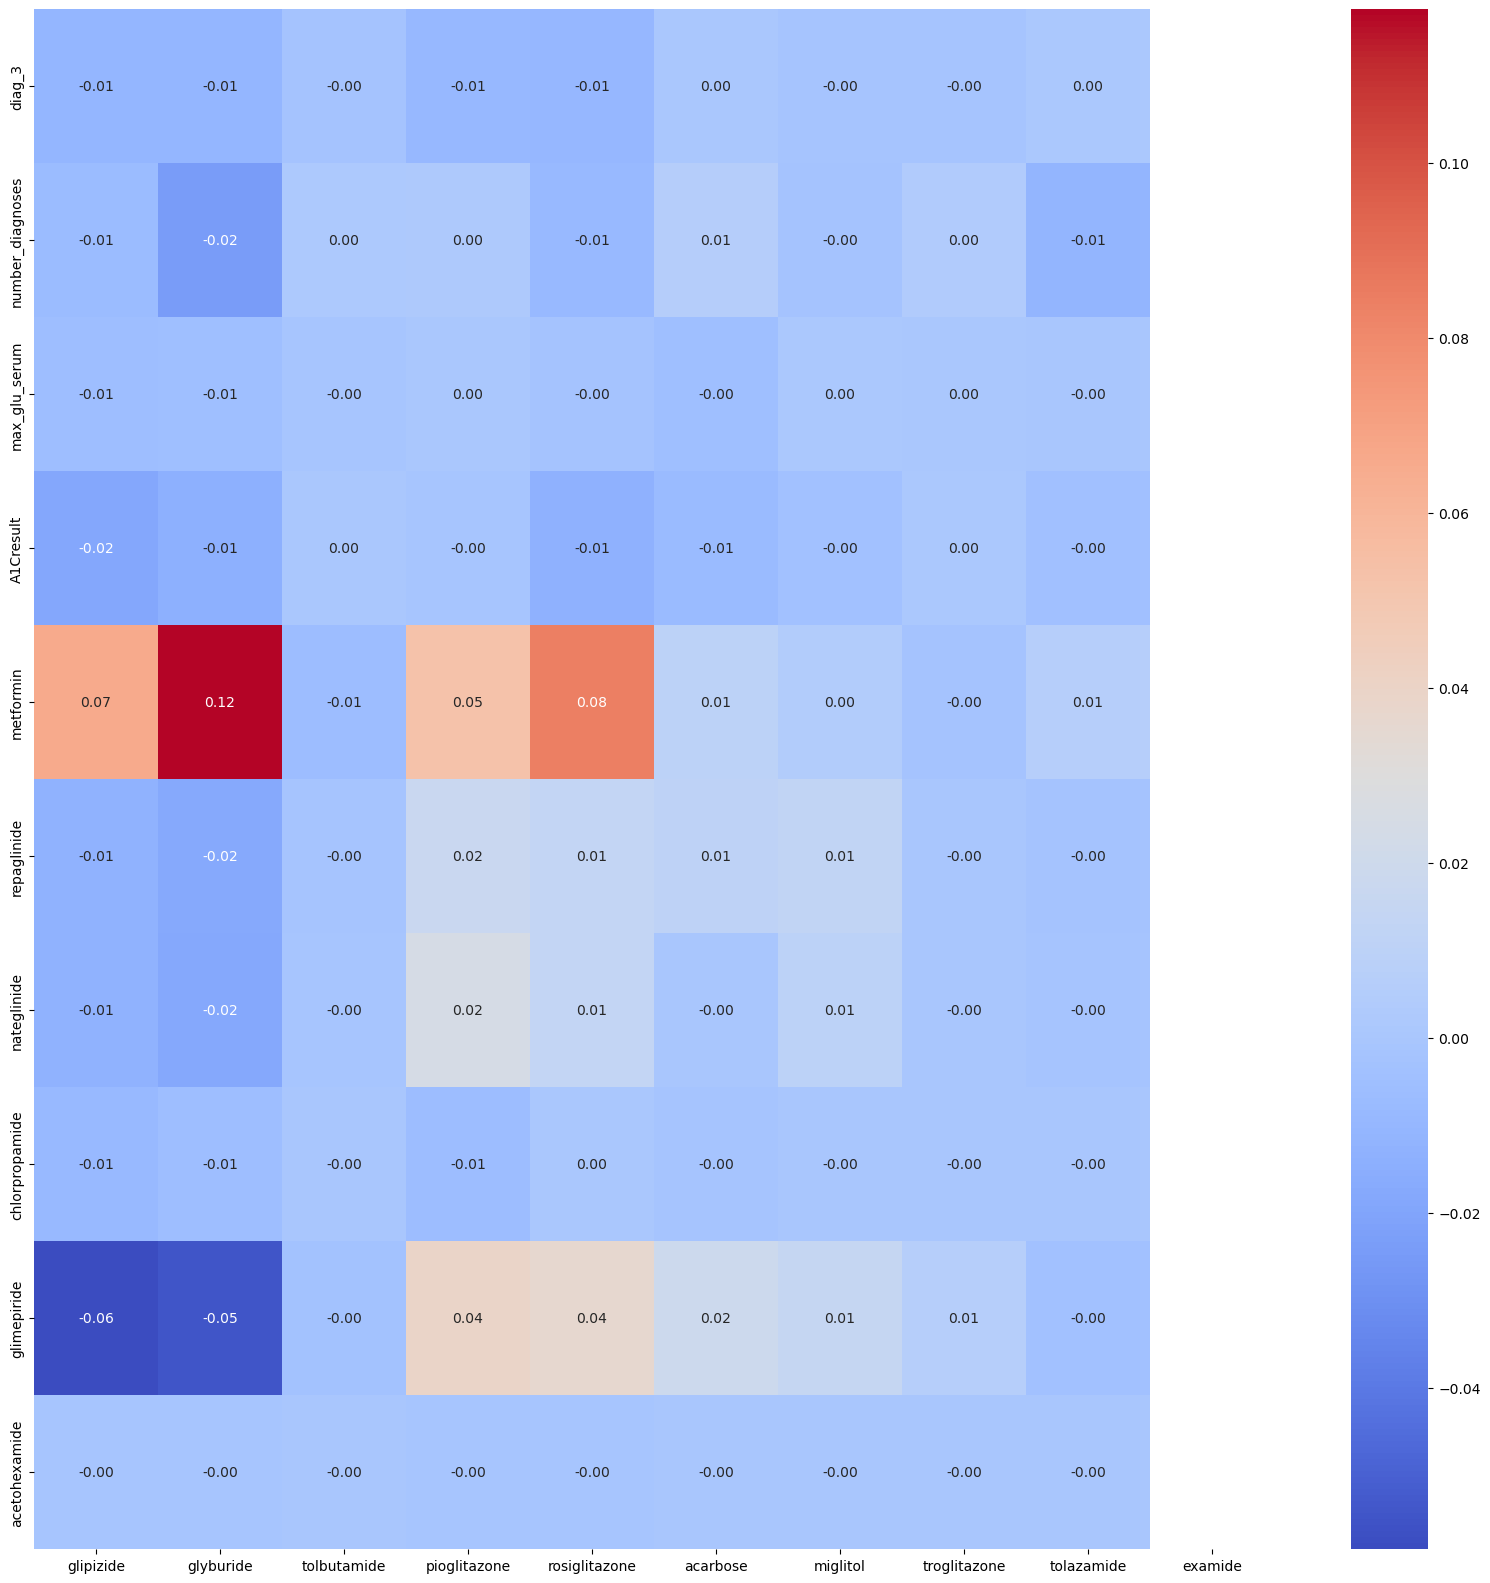

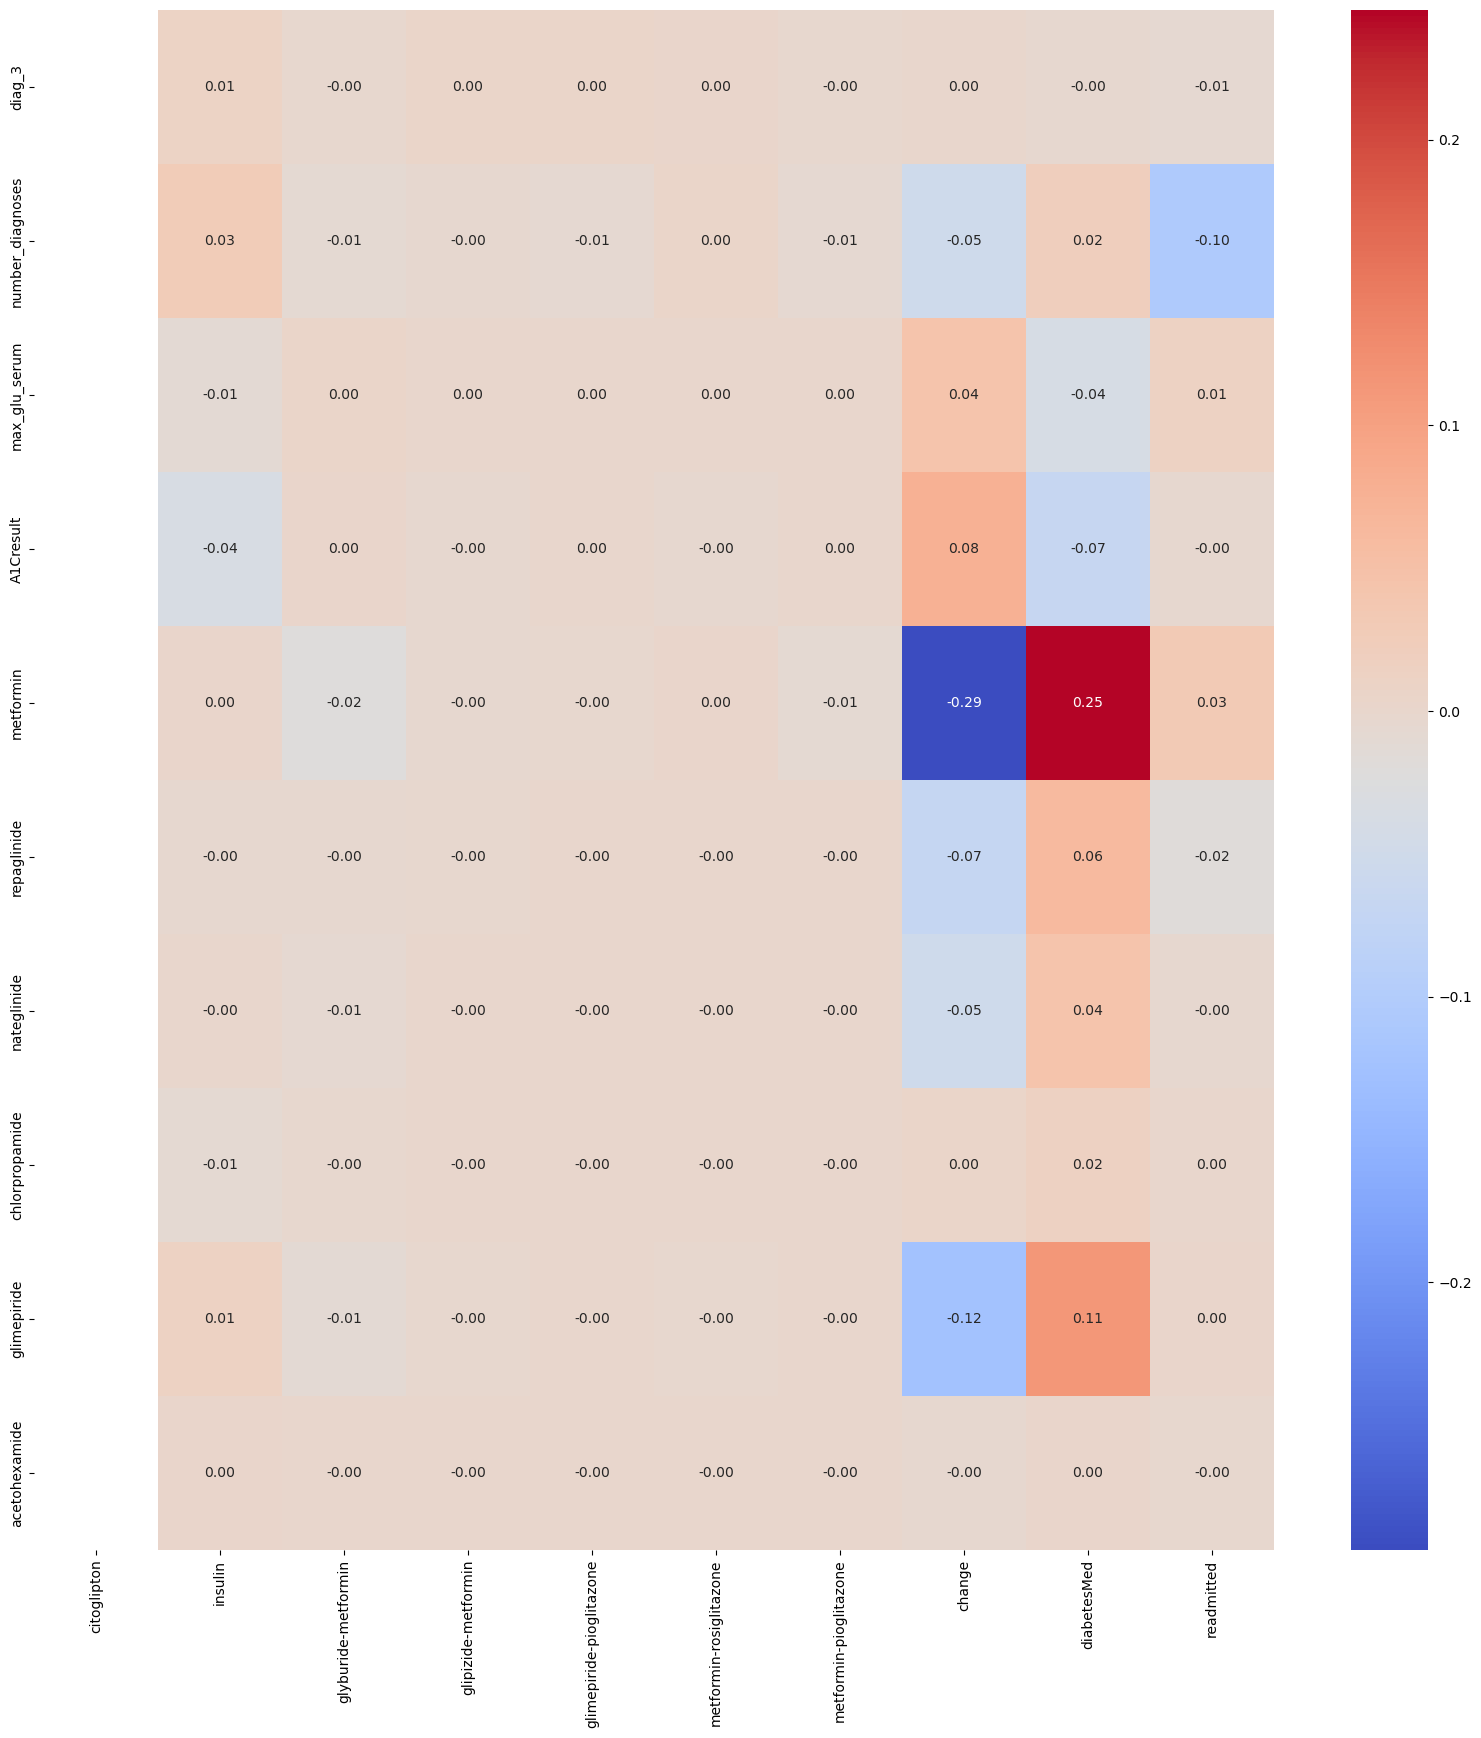

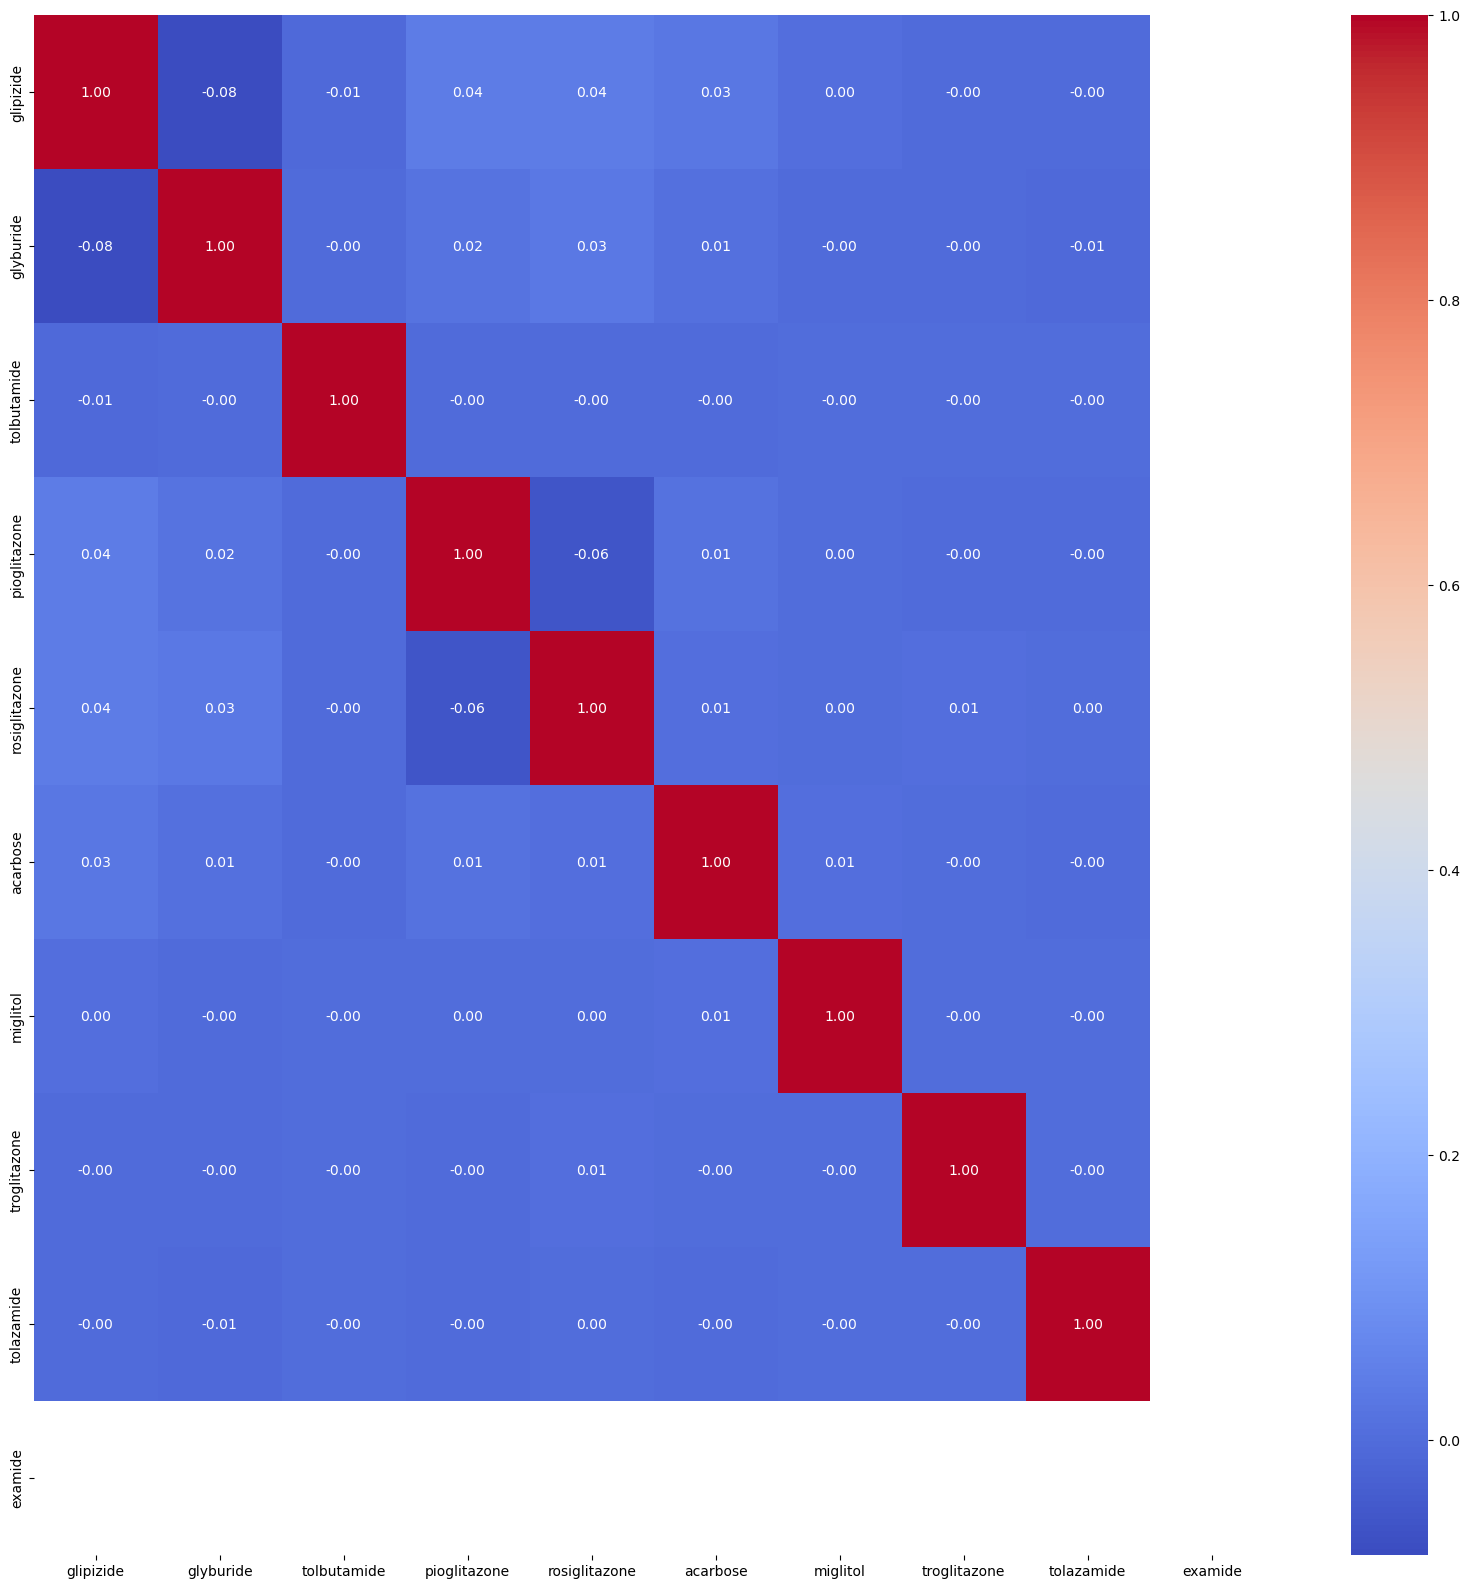

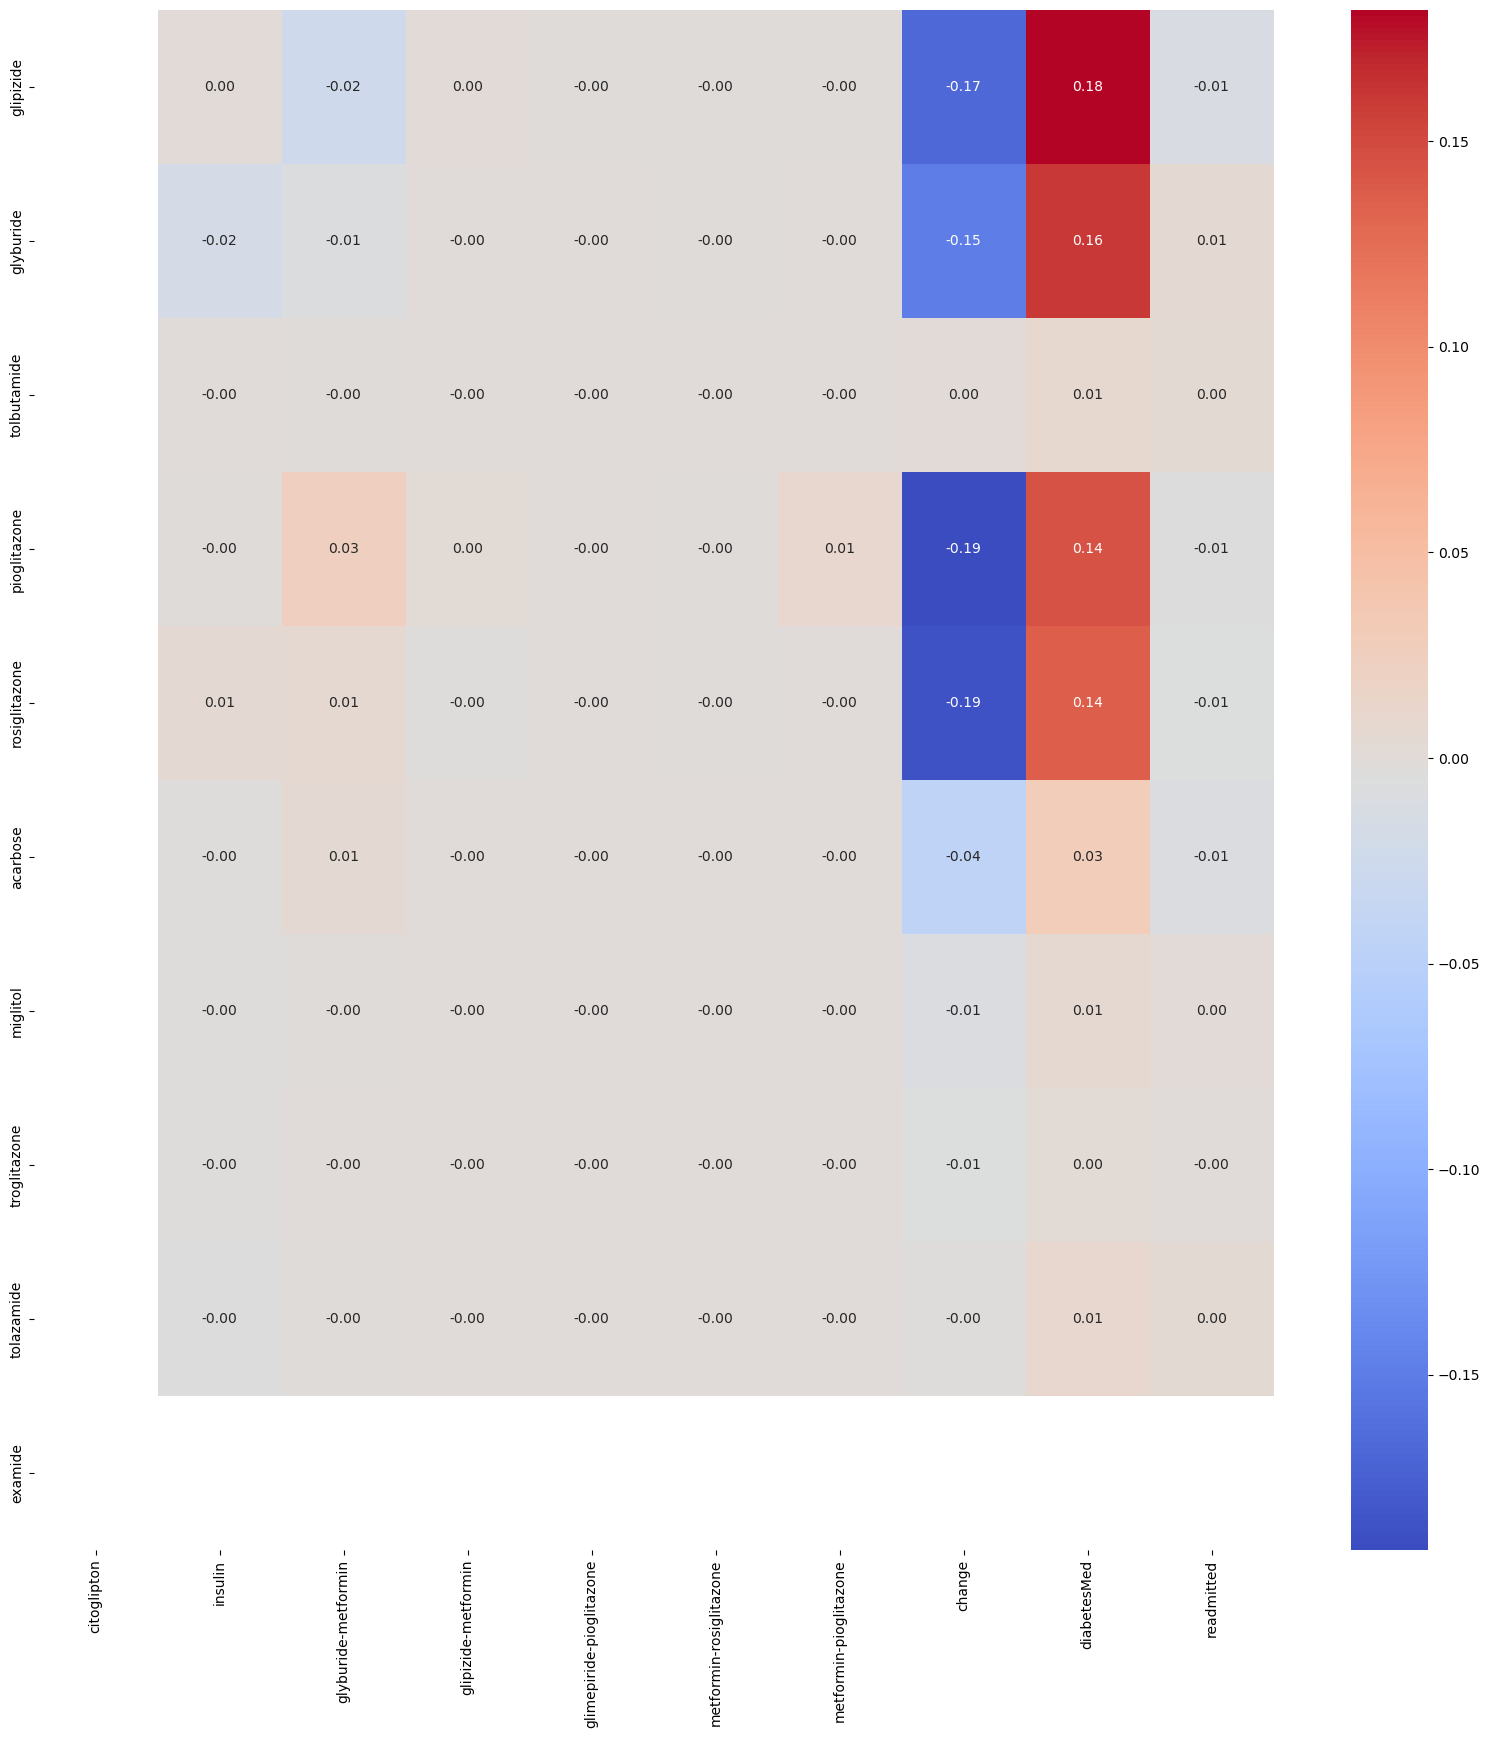

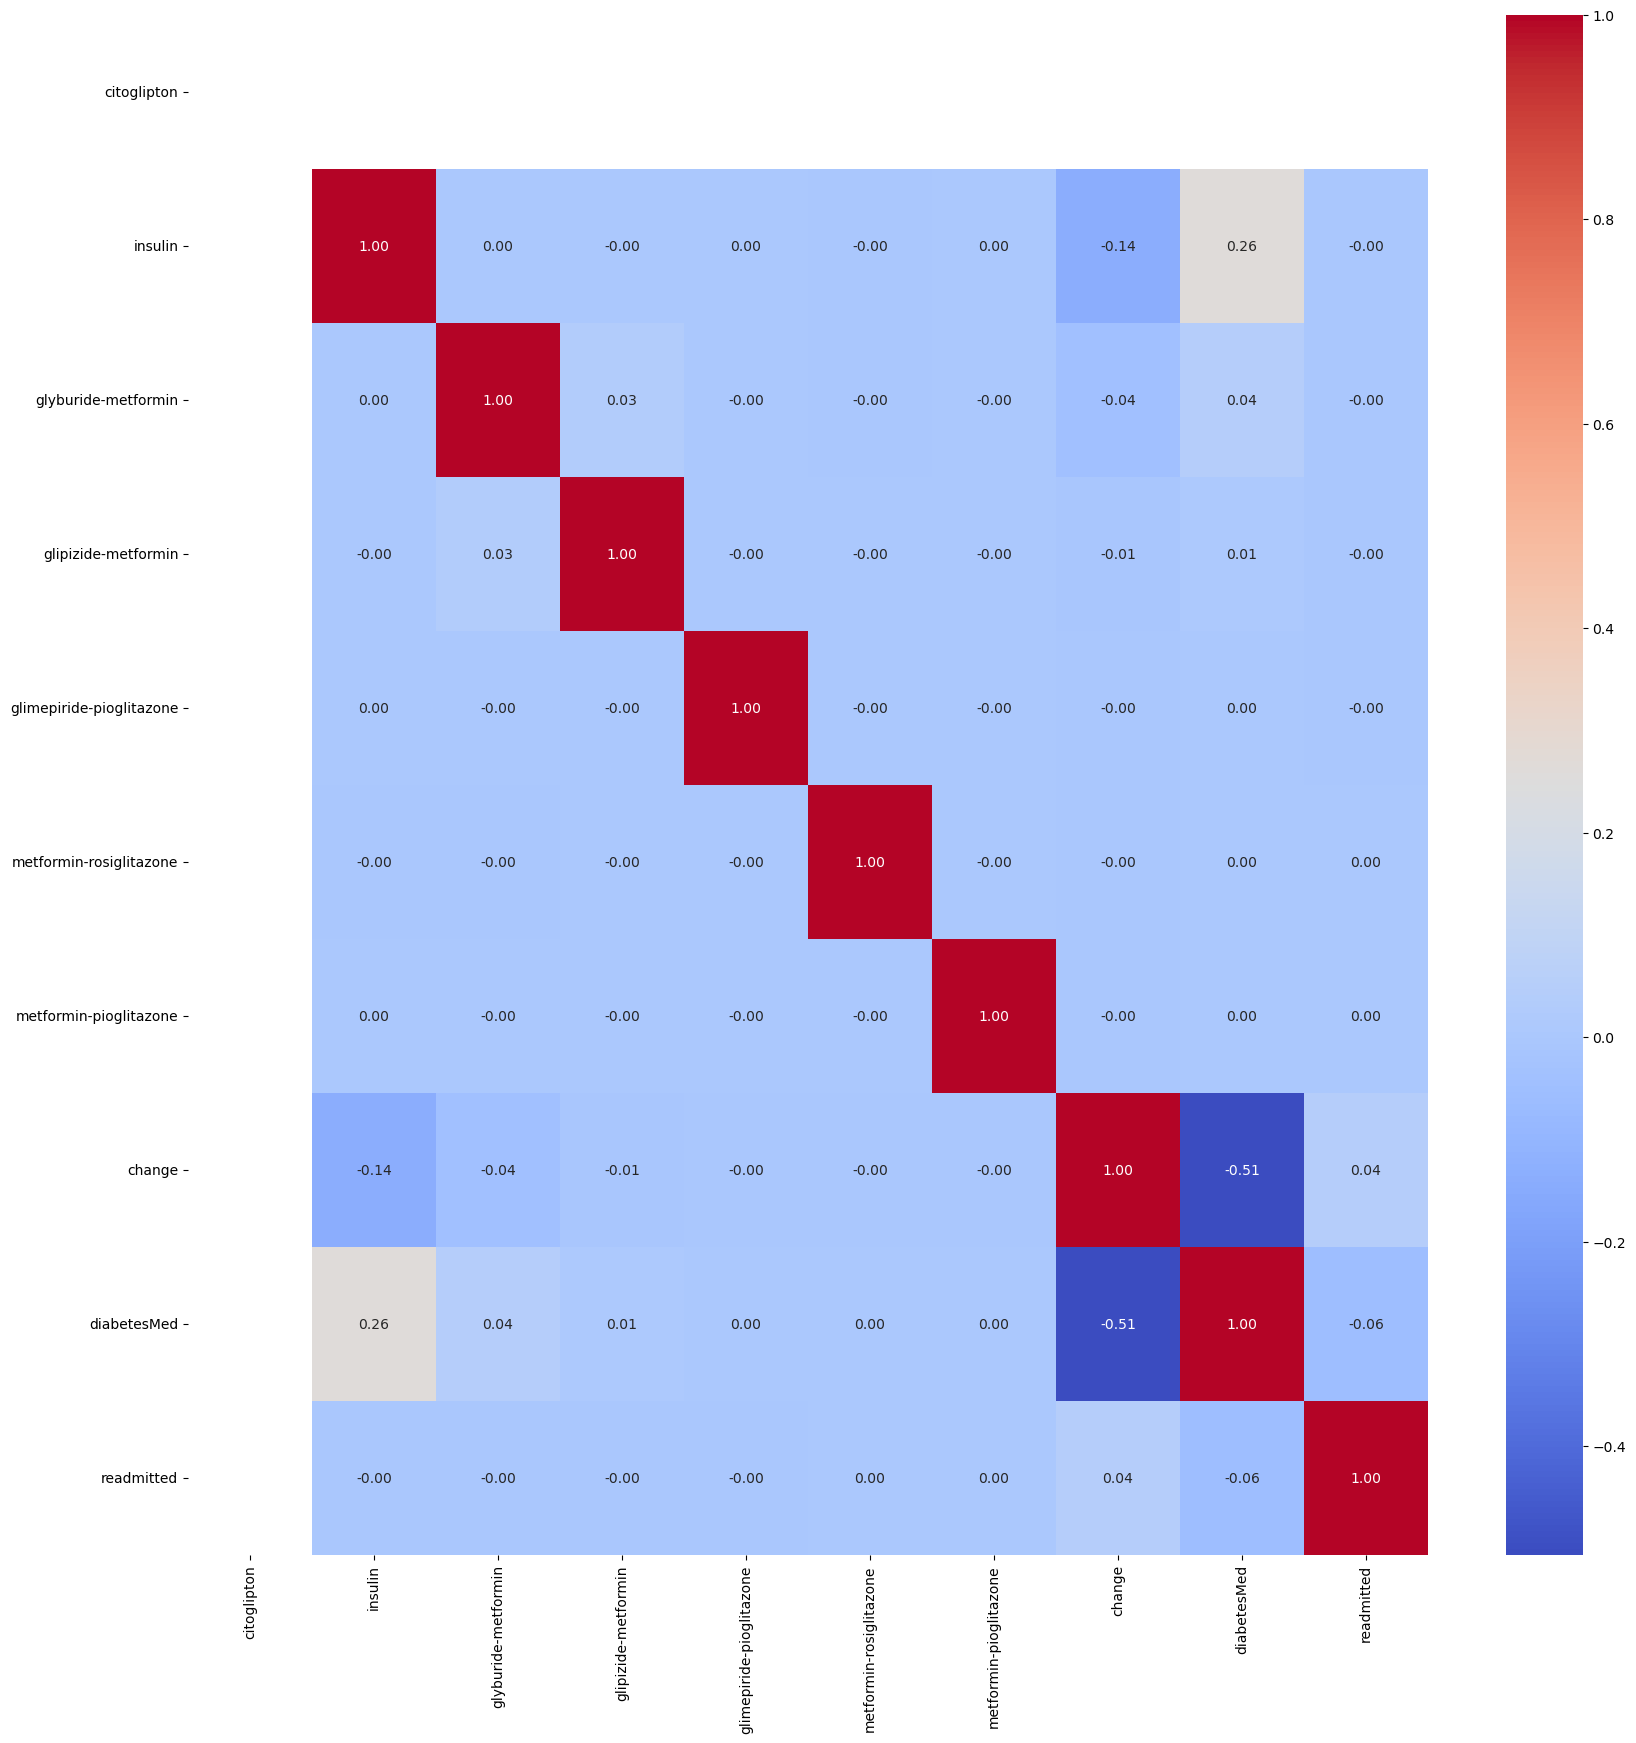

In [18]:
# I am going to see the correlation matrix between the variables

corrmat_new = diab.corr()# create the correlation matrix
#print the headmap of the group which have been made
for i in range(0,5):
    for j in range(i,5):
        plt.figure(figsize = (20,20)) 
        sns.heatmap(corrmat_new.loc[sep[i], sep[j]], annot=True, cmap='coolwarm', fmt='.2f')
        plt.show()

In [19]:
# I am going to split the dataset into training and testing sets
# first i separate the predictive variable Y and the predictors variables X
y= diab['readmitted']
x = diab.drop(['readmitted'], axis=1)
#create the training and testing sets using to create de testing set the 20% of data
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=23)

In [20]:
#set that I will use a logistic regression model to do the regression
modelo = LogisticRegression(max_iter=100000)
#train the model
modelo.fit(x_train,y_train)

LogisticRegression(max_iter=100000)

In [21]:
#now i am going to make predictions using the linear regression model
y_pred = modelo.predict(x_test)

In [22]:
# i will print the classification report, the accuracy and the f1_score
print('Logistic model Classification Report\n', classification_report(y_test, y_pred, zero_division = 0.0))
print('Logistic model Accuracy', accuracy_score(y_test, y_pred))
print('Logistic model f1_score', f1_score(y_test, y_pred, average='micro'))

Logistic model Classification Report
               precision    recall  f1-score   support

           0       0.45      0.00      0.01      2242
           1       0.51      0.28      0.36      7147
           2       0.59      0.89      0.71     10965

    accuracy                           0.58     20354
   macro avg       0.52      0.39      0.36     20354
weighted avg       0.55      0.58      0.51     20354

Logistic model Accuracy 0.5770364547509089
Logistic model f1_score 0.5770364547509089


In [23]:
# i will print the confusion matrix
print('Logistic model Confusion Matrix\n', confusion_matrix(y_test, y_pred))

Logistic model Confusion Matrix
 [[  10  720 1512]
 [   9 2007 5131]
 [   3 1234 9728]]


In [24]:
# now study the importance of each variable to predict the readmission
result = permutation_importance(modelo, x_train, y_train)
mostrar = pd.DataFrame()
mostrar['variables'] =  x_train.columns.values
mostrar['importance'] = result['importances_mean']
mostrar

,variables,importance
0,encounter_id,0.020294
1,patient_nbr,0.014433
2,race,-0.000351
3,gender,0.000224
4,age,-0.000712
5,weight,0.000875
6,admission_type_id,-0.000327
7,discharge_disposition_id,0.003353
8,admission_source_id,-0.000307
9,time_in_hospital,-0.000182


Text(0.5, 0, 'Decrease in accuracy score')

<Figure size 4000x4000 with 0 Axes>

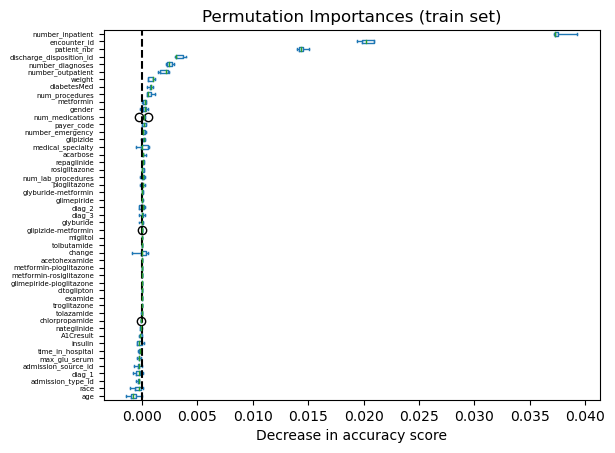

In [25]:
plt.figure(figsize = (40,40))
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=x.columns[sorted_importances_idx],
)

importances.plot.box(vert=False, whis=10)
plt.yticks(fontsize=5)
plt.title("Permutation Importances (train set)")
plt.axvline(x=0, color="k", linestyle="--")
plt.xlabel("Decrease in accuracy score")


In [26]:
# summarize the most important variables
diab[['number_inpatient', 'encounter_id', 'patient_nbr', 'discharge_disposition_id', 'number_diagnoses', 'number_outpatient', 'num_procedures']].describe()#show the structure of the data

,number_inpatient,encounter_id,patient_nbr,discharge_disposition_id,number_diagnoses,number_outpatient,num_procedures
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,0.030265,0.372169,0.286699,0.100579,0.428174,0.008794,0.223288
std,0.060136,0.231248,0.204200,0.195562,0.128907,0.030173,0.284301
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.191388,0.123550,0.000000,0.333333,0.000000,0.000000
50%,0.000000,0.343303,0.240129,0.000000,0.466667,0.000000,0.166667
75%,0.047619,0.518770,0.461977,0.111111,0.533333,0.000000,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
